# OList Marketing and Retail Analytics 
                - Capstone Project by Lavanya Ravilla 

Problem Statement - I
In the recent past, e-commerce companies have emerged and flourished in the industry. They offer the convenience to order from a wide variety of options from the comfort of one’s home. But how do they offer these “wide variety of options or products”?

To be able to meet the demands of the customers, any e-commerce company would obviously need to store tons and tons of products in warehouses. Now, some of these warehoused products might be fast-moving products which sell very quickly and some others might be slow-moving.

Each of the products being stored incurs a cost to the company in terms of space and maintenance. Since storing these products obviously add to the costs that the company incurs, it is absolutely necessary for the organisations to plan their inventory well.

Now, OList is one such e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing.

In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.





Problem Statement - II
After developing an understanding of the problem statement and the dataset, it is important to think about your approach to solve the problem. It is always advisable to break down a complex problem into smaller, simpler ones. This is called structured problem solving.

The structured problem approach that you will be using here is the 80-20 rule of the Pareto analysis. In general, this 80-20 rule asserts that 80% of outcomes (or outputs) result from 20% of all causes (or inputs) for any given event. Again, the 80-20 number is not iron-clad and can be tweaked a little on a case by case basis. After using Pareto for your analysis let us see what all other important aspects are there that you need to consider to solve the problem.

# Importing libraries


In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Filtering out the warnings.
import warnings
warnings.filterwarnings("ignore")

# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# # Other libraries of use

# import datetime  ## Datetime package
# import os

#Model Building libraries
import statsmodels.api as sm

Retail dataset contains 

Order worksheet with  'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date' columns 
        
Order Items worksheet such as order item id, seller id, price, shipping charges, etc.
Customer worksheet such as customer is, customer city, customer state, etc.
Payment worksheet such as payment type, payment value, etc.
Product worksheet such as product id, product category name, product dimensions





In [2]:
# User Defined Function to check the class distribution for the categorical variables

def Value_Count(df):
    for i in df.columns:
        if df.dtypes[i]=='object':
            total = df[i].value_counts()
            percent= df[i].value_counts(normalize=True).round(4)*100
            
            
            tt=pd.concat([total,percent], axis=1, keys=['Total','Percent'])
            print (i,tt,'\n\n')

Task 3: Preparing Data

# orders table 

subtask 1: Load and preliminary observation of orders data

In [3]:
#read the order table data
df_orders = pd.read_excel('Retail_dataset.xlsx', sheet_name=2) 

In [4]:
df_orders.shape ## Checking the number of rows and columns in the dataframe

(99441, 7)

Comment 1 : There are 99441 rows and 7 columns in the dataframe.

In [5]:
df_orders.info() ## Check the column-wise info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


Comment 1 : The datatypes of all variables in 'orders' are correct.

Comment 2 : It seems 'order_approved_at' and 'order_delivered_timestamp' contains some missing values.

In [6]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

In [7]:
# check the structure and contents of the orders dataset
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [8]:
Value_Count(df_orders)

order_id                                   Total  Percent
order_id                                        
e481f51cbdc54678b7cc49136f2d6af7      1      0.0
f01059d0d674e1282df4e8fbbe015aa2      1      0.0
fbc17f0f2a2125054d5ac5c22d2d5120      1      0.0
9373150545066777b1cd2bc20e93cf8e      1      0.0
917399e96f92268dfa2c0351b1b75fba      1      0.0
...                                 ...      ...
6b8986012d61963295ffa3ea869aff86      1      0.0
be879f757debd3b384b540daa6ddd97e      1      0.0
ac3ce7eda1246f39509a505242fcc169      1      0.0
e801a93b3904ca9e8350f176a037047b      1      0.0
66dea50a8b16d9b4dee7af250b4be1a5      1      0.0

[99441 rows x 2 columns] 


customer_id                                   Total  Percent
customer_id                                     
8d50f5eadf50201ccdcedfb9e2ac8455     17     0.02
3e43e6105506432c953e165fb2acf44c      9     0.01
1b6c7548a2a1f9037c1fd3ddfed95f33      7     0.01
ca77025e7201e3b30c44b472ff346268      7     0.01
6469f99c1f9dfae7733

comment 1: Olist even with a 0.63% cancellation rate, 99.37% of orders proceed through to delivery, signifying customer trust and commitment to purchase
    
    

# comment : As per requirment stated ,analysing with delivered order status only 

In [9]:


df_orders = df_orders[(df_orders['order_status'] == 'delivered')]

In [10]:
#Check duplicate rows in a DataFrame
df_orders.duplicated().any()

False

In [11]:
# checking for null values in orders table
percent=round(df_orders.isnull().sum()/len(df_orders)*100,2).sort_values(ascending=False)
total=df_orders.isnull().sum().sort_values(ascending=False)
pd.concat([percent,total],axis=1,keys=['Percent','Total'])

,Percent,Total
order_approved_at,0.01,14
order_delivered_timestamp,0.01,8
order_id,0.00,0
customer_id,0.00,0
order_status,0.00,0
order_purchase_timestamp,0.00,0
order_estimated_delivery_date,0.00,0


comment 1 :'order_approved_at' might indicate pending orders or issues with approval processes.
comment 2: 'order_delivered_timestamp' has missing values may be because it could be related with the 'order_status' as where the 'order_status' is other than 'delivered', contains missing value.

In [12]:
Value_Count(df_orders)

order_id                                   Total  Percent
order_id                                        
e481f51cbdc54678b7cc49136f2d6af7      1      0.0
632f22d24375715fbfa8c0ae2e5d35b7      1      0.0
98b2c1f7a79d3a9b3c053ac187ca9ac3      1      0.0
c39a72135411c01196b59720b6c0979f      1      0.0
6e1544fdf72a0f33f9d87bc0a3c6aefe      1      0.0
...                                 ...      ...
17e5131fe1d4b1a8dc14d4a66914f9d7      1      0.0
911caddee9193485ecfacba64e139beb      1      0.0
36acd0e7abb8ba0ac7fba360e09c5451      1      0.0
54c60b5e55b7cfa229a34e7ef63ddb96      1      0.0
66dea50a8b16d9b4dee7af250b4be1a5      1      0.0

[96478 rows x 2 columns] 


customer_id                                   Total  Percent
customer_id                                     
8d50f5eadf50201ccdcedfb9e2ac8455     15     0.02
3e43e6105506432c953e165fb2acf44c      9     0.01
ca77025e7201e3b30c44b472ff346268      7     0.01
6469f99c1f9dfae7733b25662e7f1782      7     0.01
1b6c7548a2a1f9037c1

comment: This confirms only delivered order_status is filtered  

In [13]:
# Logically, order_purchase_timestamp cannot be greater than order_approved_at
((df_orders['order_purchase_timestamp'] <= df_orders['order_approved_at']) == False).sum()

# There are 14 order_purchase_timestamp which is greater than order_approved_at which is impossible as no order cannot be

14

In [14]:
false_1 = df_orders[(df_orders['order_purchase_timestamp'] <= df_orders['order_approved_at']) == False]
false_1[['order_purchase_timestamp','order_approved_at']]

,order_purchase_timestamp,order_approved_at
5323,2017-02-18 14:40:00,NaT
16567,2017-02-18 12:45:31,NaT
19031,2017-02-18 13:29:47,NaT
22663,2017-02-18 16:48:35,NaT
23156,2017-02-17 13:05:55,NaT
26800,2017-01-19 12:48:08,NaT
38290,2017-02-19 01:28:47,NaT
39334,2017-02-18 11:04:19,NaT
48401,2017-01-19 22:26:59,NaT
61743,2017-02-17 17:21:55,NaT


In [15]:
print(len(false_1))
false_1.index

14


Index([ 5323, 16567, 19031, 22663, 23156, 26800, 38290, 39334, 48401, 61743,
       63052, 67697, 72407, 84999],
      dtype='int64')

In [16]:
for index in df_orders.index:
    for fal_index in false_1.index:
        if  index == fal_index:
            df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'], inplace=True)

In [17]:
index = [5323,16567,19031,22663,23156,26800,38290,39334,48401,61743,63052,67697,72407,84999]
df_orders[df_orders.index==39334]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
39334,d77031d6a3c8a52f019764e68f211c69,c4c0011e639bdbcf26059ddc38bd3c18,delivered,2017-02-18 11:04:19,2017-02-18 11:04:19,2017-03-02 16:15:23,2017-03-22


In [18]:
# Logically, order_purchase_timestamp cannot be greater than order_delivered_timestamp
((df_orders['order_purchase_timestamp'] < df_orders['order_delivered_timestamp']) == False).sum()

# There are 8 order_purchase_timestamp which is greater than order_approved_at which is impossible as no order cannot be

8

In [19]:
false_2 = df_orders[(df_orders['order_purchase_timestamp'] < df_orders['order_delivered_timestamp']) == False]
false_2[['order_purchase_timestamp','order_delivered_timestamp']]

,order_purchase_timestamp,order_delivered_timestamp
3002,2017-11-28 17:44:07,NaT
20618,2018-06-20 06:58:43,NaT
43834,2018-07-01 17:05:11,NaT
79263,2018-07-01 22:05:55,NaT
82868,2018-07-01 21:14:02,NaT
92643,2017-05-25 23:22:43,NaT
97647,2018-06-08 12:09:39,NaT
98038,2018-06-27 16:09:12,NaT


In [20]:
print(len(false_2))
false_2.index

8


Index([3002, 20618, 43834, 79263, 82868, 92643, 97647, 98038], dtype='int64')

In [21]:
df_orders.drop(false_2.index,axis = 0, inplace=True)

In [22]:
# Logically, order_purchase_timestamp cannot be greater than order_estimated_delivery_date
((df_orders['order_purchase_timestamp'] < df_orders['order_estimated_delivery_date']) == False).sum()

# There are no order_purchase_timestamp which is greater than order_estimated_delivery_date.

0

In [23]:
# Logically, order_approved_at cannot be greater than order_delivered_timestamp
((df_orders['order_approved_at'] < df_orders['order_delivered_timestamp']) == False).sum()

# There are 83 order_purchase_timestamp which are greater than order_delivered_timestamp which is impossible as no order 

61

In [24]:
false_3 = df_orders[(df_orders['order_approved_at'] < df_orders['order_delivered_timestamp']) == False]
false_3[['order_approved_at','order_delivered_timestamp']]

,order_approved_at,order_delivered_timestamp
199,2018-07-26 23:31:53,2018-07-25 23:58:19
483,2018-07-29 23:30:52,2018-07-27 18:55:57
1986,2018-08-20 15:55:42,2018-08-17 16:45:45
3659,2018-02-04 23:31:47,2018-02-01 20:10:38
11738,2017-09-13 22:04:39,2017-09-11 14:15:02
...,...,...
89703,2018-04-24 18:41:20,2018-04-24 14:03:28
91801,2018-08-20 15:56:29,2018-08-15 14:56:43
93680,2018-07-05 16:21:50,2018-07-05 13:32:49
94359,2018-08-02 23:30:29,2018-08-01 19:04:37


In [25]:
print(len(false_3))
false_3.index

61


Index([  199,   483,  1986,  3659, 11738, 13470, 14562, 16345, 18097, 20557,
       24212, 24823, 25383, 25411, 27309, 27411, 27804, 28593, 31211, 35063,
       36611, 37032, 38031, 39360, 40421, 41592, 43418, 46163, 46262, 48438,
       48469, 50623, 52675, 57637, 61544, 64231, 64496, 65185, 66337, 66460,
       68134, 68417, 71860, 73985, 74187, 74471, 75631, 76333, 81925, 85393,
       86230, 86522, 86729, 87076, 88063, 89581, 89703, 91801, 93680, 94359,
       98359],
      dtype='int64')

In [26]:
df_orders.drop(false_3.index,axis = 0, inplace=True)
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [27]:
# Logically, order_approved_at cannot be greater than order_estimated_delivery_date
((df_orders['order_approved_at'] < df_orders['order_estimated_delivery_date']) == False).sum()

# There are 20 order_approved_at that are greater than order_estimated_delivery_date which 
# is impossible as no order cannot be can get an estimated delivery time prior to its approval by the seller.

1

In [28]:
false_4 = df_orders[(df_orders['order_approved_at'] < df_orders['order_estimated_delivery_date']) == False]
false_4[['order_approved_at','order_estimated_delivery_date']]

,order_approved_at,order_estimated_delivery_date
55353,2018-08-24 22:05:08,2018-08-23


In [29]:
print(len(false_4))
false_4.index

1


Index([55353], dtype='int64')

In [30]:
df_orders.drop(false_4.index,axis = 0, inplace=True)
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [31]:
# Logically, order_delivered_timestamp cannot be greater than order_estimated_delivery_date
((df_orders['order_delivered_timestamp'] <= df_orders['order_estimated_delivery_date']) == False).sum()

# There are 7834 order_delivered_timestamp that are greater than order_estimated_delivery_date which 
# means that these many orders delivered late.
## As per instructions, we have to work with all the delivered orders, so we can ignore this check and consider these order

7823

In [32]:
# As we have to work with all the delivered orders, 
# so we can drop the 'order_status' column as it only contains unary value i.e. 'delivered'.
df_orders.drop(columns='order_status',axis = 1, inplace=True)
df_orders.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [33]:
df_orders.isnull().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

In [34]:
df_orders.shape

(96408, 6)

In [35]:
df_orders_temp=df_orders.groupby("order_id")['customer_id'].count().reset_index()

In [36]:
# we can see each order_id is unique in orders table
df_orders_temp.sort_values(by=['customer_id'],ascending=False)

,order_id,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
64268,ab2e3d4093bad08937a1d844c1a60355,1
64277,ab344aaf7040ad7bcee8c7ae7db9e87e,1
64276,ab30f8d4ebb7d33d1dcf54d420ea42cd,1
64275,ab30f399d360ddf62897051d813f887d,1
...,...,...
32134,555761ab2426364f42e9e018047df4e0,1
32133,55573ba9c7c0f45fc1c1b30bb498bbf6,1
32132,55567a8e851b2400b53f74ec9b974221,1
32131,55557ec21b58ecf22cea0ca3e8ade908,1


comment:We can see that for each unique id their is wunique customer_id

In [37]:
df_orders.head(2)

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13


#  Order Item table 

In [38]:
# order_items table data cleaning

In [39]:
 #read the data
df_order_items = pd.read_excel('Retail_dataset.xlsx', sheet_name=3) 

In [40]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [41]:
#Check duplicate rows in a DataFrame
df_order_items.duplicated().any()

False

In [42]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [43]:
# checking for null values in order_items table
percent=round(df_order_items.isnull().sum()/len(df_order_items)*100,2).sort_values(ascending=False)
total=df_order_items.isnull().sum().sort_values(ascending=False)
pd.concat([percent,total],axis=1,keys=['Percent','Total'])

,Percent,Total
order_id,0.0,0
order_item_id,0.0,0
product_id,0.0,0
seller_id,0.0,0
price,0.0,0
shipping_charges,0.0,0


comment:NO missing data found in order_items table

In [44]:
Value_Count(df_order_items)

order_id                                   Total  Percent
order_id                                        
8272b63d03f5f79c56e9e4120aec44ef     21     0.02
1b15974a0141d54e36626dca3fdc731a     20     0.02
ab14fdcfbe524636d65ee38360e22ce8     20     0.02
9ef13efd6949e4573a18964dd1bbe7f5     15     0.01
428a2f660dc84138d969ccd69a0ab6d5     15     0.01
...                                 ...      ...
5a0911d70c1f85d3bed0df1bf693a6dd      1     0.00
5a082b558a3798d3e36d93bfa8ca1eae      1     0.00
5a07264682e0b8fbb3f166edbbffc6e8      1     0.00
5a071192a28951b76774e5a760c8c9b7      1     0.00
fffe41c64501cc87c801fd61db3f6244      1     0.00

[98666 rows x 2 columns] 


product_id                                   Total  Percent
product_id                                      
aca2eb7d00ea1a7b8ebd4e68314663af    527     0.47
99a4788cb24856965c36a24e339b6058    488     0.43
422879e10f46682990de24d770e7f83d    484     0.43
389d119b48cf3043d311335e499d9c6b    392     0.35
368c6c730842d78016ad

In [45]:
# Checking how many items most of the customers purchase 
it_count_df=pd.DataFrame(df_order_items['order_item_id'].value_counts())
it_count_df['percent_of_number_of_orders']=round(df_order_items['order_item_id'].value_counts(normalize=True),4)*100
it_count_df=it_count_df.reset_index()
it_count_df.columns=['number_of_items','number_of_orders','percent_of_number_of_orders']
it_count_df

,number_of_items,number_of_orders,percent_of_number_of_orders
0,1,98666,87.59
1,2,9803,8.70
2,3,2287,2.03
3,4,965,0.86
4,5,460,0.41
5,6,256,0.23
6,7,58,0.05
7,8,36,0.03
8,9,28,0.02
9,10,25,0.02


comment:customers who bought first 3 items sum up to 98.32%.

In [46]:
# rounded shipping charges, with decimal values converted to their nearest whole numbers for readability
df_order_items['shipping_charges'] = df_order_items['shipping_charges'].round()

In [47]:
# rounded price, with decimal values converted to their nearest whole numbers for readability
df_order_items['price'] = df_order_items['price'].round()

In [48]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,59.0,13.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,240.0,20.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0,18.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,13.0,13.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,200.0,18.0


In [49]:
df_order_items.shape

(112650, 6)

In [50]:
df_order_items['shipping_charges'].dtype

dtype('float64')

In [51]:
# changing datatype from float to integer
df_order_items['shipping_charges'] = df_order_items['shipping_charges'].round().astype('int64')

In [52]:
# changing datatype from float to integer
df_order_items['price'] = df_order_items['price'].round().astype('int64')

In [53]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          112650 non-null  object
 1   order_item_id     112650 non-null  int64 
 2   product_id        112650 non-null  object
 3   seller_id         112650 non-null  object
 4   price             112650 non-null  int64 
 5   shipping_charges  112650 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.2+ MB


In [54]:
# checking for duplicates at order_id and order_item_id level 

In [55]:
df_orders_item_dup=df_order_items.groupby("order_id")['order_item_id'].count().reset_index()

In [56]:
df_orders_item_dup

,order_id,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


In [57]:
df_orders_item_dup.sort_values(by=['order_item_id'],ascending=False)

,order_id,order_item_id
50137,8272b63d03f5f79c56e9e4120aec44ef,21
10459,1b15974a0141d54e36626dca3fdc731a,20
65715,ab14fdcfbe524636d65ee38360e22ce8,20
60941,9ef13efd6949e4573a18964dd1bbe7f5,15
25583,428a2f660dc84138d969ccd69a0ab6d5,15
...,...,...
34640,5a0911d70c1f85d3bed0df1bf693a6dd,1
34639,5a082b558a3798d3e36d93bfa8ca1eae,1
34637,5a07264682e0b8fbb3f166edbbffc6e8,1
34636,5a071192a28951b76774e5a760c8c9b7,1


insight: we can see each order_id has >= 1 and < 21 order item count 

In [58]:
df_order_items.loc[df_order_items['order_id']=='8272b63d03f5f79c56e9e4120aec44ef',:]

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1,8
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1,8
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1,8
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1,8
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1,8
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1,8
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1,8
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1,8
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1,8
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1,8


In [59]:
df_order_items.loc[df_order_items['order_id']=='8272b63d03f5f79c56e9e4120aec44ef',:]['order_item_id'].sum()
# For example   sum of order_item_id with respect to order_id '8272b63d03f5f79c56e9e4120aec44ef' is 231

231

Insight: "Each order, identified by its unique order_id, contains multiple items with varying products, as revealed by grouping the data at the product_id level."

In [60]:
# Grouping at order id and product level
df_order_items1=df_order_items.groupby(['order_id','product_id'])[['price', 'shipping_charges', 'order_item_id']].agg(
    {'price': 'sum', 'shipping_charges': 'sum' ,'order_item_id':'sum'}
).sort_values(by=['product_id'],ascending=False)
 

In [61]:
df_order_items1=df_order_items1.reset_index()

In [62]:
df_order_items1.sort_values(by=['product_id'],ascending=False)

,order_id,product_id,price,shipping_charges,order_item_id
0,fbf3da6fe82010412982890b0c57e532,fffe9eeff12fcbd74a2f2b007dde0c58,250,54,1
4,beaf95465b542dea76df78b2fb86a97a,fffdb2d0ec8d6a61f0a0a0db3f25b441,35,18,1
5,dd38c566a34ff9deb93ff05d7bd6d0aa,fffdb2d0ec8d6a61f0a0a0db3f25b441,35,7,1
1,a8159270bc9cf7d54450e079ba6b7232,fffdb2d0ec8d6a61f0a0a0db3f25b441,30,18,1
3,2878b4e373a9556df9aa1708a4e5c3c8,fffdb2d0ec8d6a61f0a0a0db3f25b441,35,8,1
...,...,...,...,...,...
102420,6f0dfb5b5398b271cc6bbd9ee263530e,000b8f95fcb9e0096488278317764d19,59,20,1
102421,3aba44d8e554ab4bb8c09f6f78032ca8,000b8f95fcb9e0096488278317764d19,59,20,1
102422,0bf736fd0fd5169d60de3699fcbcf986,0009406fd7479715e4bef61dd91f2462,229,13,1
102423,f5eda0ded77c1293b04c953138c8331d,00088930e925c41fd95ebfe695fd2655,130,14,1


In [63]:
# cross checking at product level
df_order_items2= df_order_items1.groupby("order_id")['product_id'].count().reset_index()

In [64]:
df_order_items2.sort_values(by=['product_id'],ascending=False)

,order_id,product_id
77909,ca3625898fbd48669d50701aba51cd5f,8
48309,7d8f5bfd5aff648220374a2df62e84d5,7
46116,77df84f9195be22a4e9cb72ca9e8b4c2,7
66653,ad850e69fce9a512ada84086651a2e7d,7
36443,5efc0b7fe9df7f0c567404abaa4d25fc,6
...,...,...
33440,56d0a27ec26d1644336aff1ec939c089,1
33439,56d01e37808556640e75a40c8202b0a8,1
33438,56ce64b53ec3bb5b0525f21506619f8e,1
33437,56ce3873eb6d633a47581ec221f50a65,1


In [65]:
df_order_items2.shape

(98666, 2)

In [66]:
df_order_items1.loc[df_order_items1['order_id']=='8272b63d03f5f79c56e9e4120aec44ef',:]
# cross checking order_item_id after gruping at product_id level

,order_id,product_id,price,shipping_charges,order_item_id
52772,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,8,7,21
87169,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,10,80,145
100558,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,10,80,65


In [67]:
df_order_items1.duplicated().any()

False

In [68]:
df_order_items1.shape

(102425, 5)

In [69]:
df_orders.shape

(96408, 6)

In [70]:
df_order_items1.head(2)

,order_id,product_id,price,shipping_charges,order_item_id
0,fbf3da6fe82010412982890b0c57e532,fffe9eeff12fcbd74a2f2b007dde0c58,250,54,1
1,a8159270bc9cf7d54450e079ba6b7232,fffdb2d0ec8d6a61f0a0a0db3f25b441,30,18,1


Identifying outliers and examining numerical fields

In [71]:
order_items_num = df_order_items1[['price', 'shipping_charges']]
order_items_num.describe(percentiles = [0, 0.01 ,0.1, 0.25, 0.5, 0.75, 0.90, 0.99, 1])  ## Check the statistical summary for t

,price,shipping_charges
count,102425.000000,102425.000000
mean,132.738394,21.979253
std,205.307893,20.464672
min,1.000000,0.000000
0%,1.000000,0.000000
1%,12.000000,5.000000
10%,25.000000,9.000000
25%,45.000000,14.000000
50%,81.000000,17.000000
75%,148.000000,23.000000


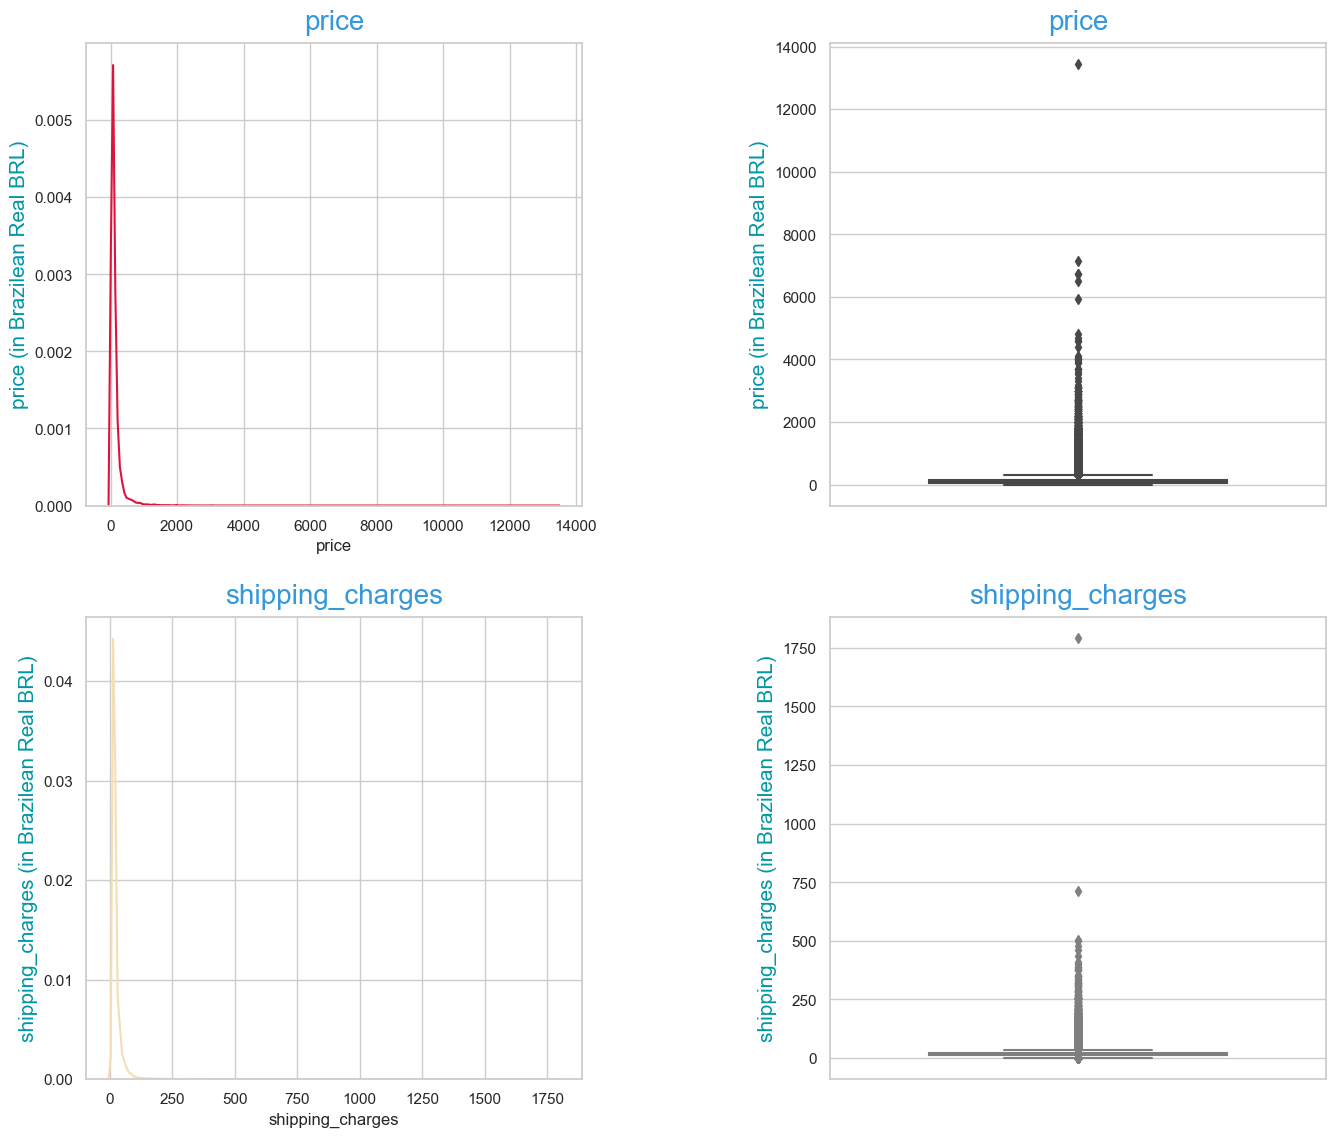

In [72]:
# Plotting the subplot of boxplots for all numerical variables in the dataset.

plt.figure(figsize=(16, 14)) 
plt.subplots_adjust(top=0.85, wspace= 0.5, hspace= 0.24)  ## setting the width of the padding between subplots

colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
pal = sns.color_palette(colors,10,1)

sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters


#  Distplot for the 'price' column.
plt.subplot(2,2,1)
sns.distplot(df_order_items1.price, color= 'Crimson', kde=True, hist=False)
plt.title('price' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('price (in Brazilean Real BRL)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'price' column.
plt.subplot(2,2,2)
sns.boxplot(y = 'price', data = df_order_items1, width=0.6, color= 'Crimson')
plt.title('price' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('price (in Brazilean Real BRL)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Distplot for the 'shipping_charges' column.
plt.subplot(2,2,3)
sns.distplot(df_order_items1.shipping_charges, kde=True, hist=False, color= 'Wheat')
plt.title('shipping_charges' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('shipping_charges (in Brazilean Real BRL)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'shipping_charges' column.
plt.subplot(2,2,4)
sns.boxplot(y = 'shipping_charges', data = df_order_items1, width=0.6, color= 'Wheat')
plt.title('shipping_charges' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('shipping_charges (in Brazilean Real BRL)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

plt.show()

comment:Shipping charges and price a positively skewed. In a positively skewed distribution, the mean will be pulled towards the tail, hence being greater than the median both visually and with stastical summary

# Joining orders and order_item table and making it as main table 

In [73]:
#Joining orders table and order_item table
df_orders_merge = pd.merge(df_orders, df_order_items1, on='order_id', how='inner') 

In [74]:
df_orders_merge.duplicated().any()

False

In [75]:
df_orders_merge.head(2)

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,119,23,1


In [76]:
df_orders_merge.isnull().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
product_id                       0
price                            0
shipping_charges                 0
order_item_id                    0
dtype: int64

In [77]:
df_orders_merge[df_orders_merge['order_approved_at'].isna()]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id


In [78]:
#   DataFrame loaded as df_orders_merge

def impute_order_approved_at(df):
    df['order_approved_at'].fillna(df['order_purchase_timestamp'], inplace=True)
    return df

df_orders_merge = impute_order_approved_at(df_orders_merge.copy())  # Use a copy to avoid modifying the original DataFrame

# Now, df_orders_merge['order_approved_at'] should have no null values,
# with missing values filled in with corresponding purchase timestamps.

In [79]:
df_orders_merge.isnull().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
product_id                       0
price                            0
shipping_charges                 0
order_item_id                    0
dtype: int64

In [80]:
df_orders_merge[df_orders_merge['order_delivered_timestamp'].isna()]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id


In [81]:
# Define a function: impute_order_delivered_timestamp handles the entire imputation process.

def impute_order_delivered_timestamp(df):
    df['order_estimated_delivery_timestamp'] = pd.to_datetime(df['order_estimated_delivery_date'])  # Convert dates to timestamps
    df['order_delivered_timestamp'].fillna(df['order_estimated_delivery_timestamp'], inplace=True)
    # Format as date and time
    df['order_delivered_timestamp'] = df['order_delivered_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')# Impute missing values
    df.drop('order_estimated_delivery_timestamp', axis=1, inplace=True)  # Drop the intermediate column
    return df

df_orders_merge = impute_order_delivered_timestamp(df_orders_merge.copy()) #Calls the function with a copy of the DataFrame to preserve the original data.

In [82]:
df_orders_merge.isnull().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
product_id                       0
price                            0
shipping_charges                 0
order_item_id                    0
dtype: int64

In [83]:
# checking the order_delivered_timestamp data
df_orders_merge[df_orders_merge['order_id']=='20edc82cf5400ce95e1afacc25798b31'] 

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id


In [84]:
# dummy variable df_orders_merge_checking only for cross checking
df_orders_merge_checking= df_orders_merge.groupby("order_id")[['product_id']].count().reset_index()
 

In [85]:
 # dummy variable df_orders_merge_checking only for cross checking
df_orders_merge_checking.sort_values(by=['product_id'],ascending=False)
 

,order_id,product_id
76161,ca3625898fbd48669d50701aba51cd5f,8
45058,77df84f9195be22a4e9cb72ca9e8b4c2,7
47209,7d8f5bfd5aff648220374a2df62e84d5,7
65146,ad850e69fce9a512ada84086651a2e7d,7
86165,e43f88863d1cc9cff18d753d439d42e8,6
...,...,...
32679,56ccc1571462d48192dc45fba66fb7d5,1
32678,56cbeec7ba721c09cf45937ec625f675,1
32677,56cbdf3f7e3f535682a007e0e3370e18,1
32676,56cb6b46e4f5912e168d6b1394525ce5,1


In [86]:
df_orders_merge.loc[df_orders_merge['order_id']=='ca3625898fbd48669d50701aba51cd5f',:]
# analysing the above cell 

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id
60217,ca3625898fbd48669d50701aba51cd5f,c8ed31310fc440a3f8031b177f9842c3,2018-08-12 02:11:20,2018-08-12 02:25:07,2018-08-21 12:18:48,2018-09-13,678c229b41c0e497d35a25a8be1cc631,96,0,7
60218,ca3625898fbd48669d50701aba51cd5f,c8ed31310fc440a3f8031b177f9842c3,2018-08-12 02:11:20,2018-08-12 02:25:07,2018-08-21 12:18:48,2018-09-13,5dae498eff2d80057f56122235a36aff,96,0,5
60219,ca3625898fbd48669d50701aba51cd5f,c8ed31310fc440a3f8031b177f9842c3,2018-08-12 02:11:20,2018-08-12 02:25:07,2018-08-21 12:18:48,2018-09-13,4a5c3967bfd3629fe07ef4d0cc8c3818,110,0,6
60220,ca3625898fbd48669d50701aba51cd5f,c8ed31310fc440a3f8031b177f9842c3,2018-08-12 02:11:20,2018-08-12 02:25:07,2018-08-21 12:18:48,2018-09-13,309dd69eb83cea38c51709d62befe1a4,112,8,19
60221,ca3625898fbd48669d50701aba51cd5f,c8ed31310fc440a3f8031b177f9842c3,2018-08-12 02:11:20,2018-08-12 02:25:07,2018-08-21 12:18:48,2018-09-13,21b524c4c060169fa75ccf08c7da4627,64,0,8
60222,ca3625898fbd48669d50701aba51cd5f,c8ed31310fc440a3f8031b177f9842c3,2018-08-12 02:11:20,2018-08-12 02:25:07,2018-08-21 12:18:48,2018-09-13,1065e0ebef073787a7bf691924c60eeb,309,2,1
60223,ca3625898fbd48669d50701aba51cd5f,c8ed31310fc440a3f8031b177f9842c3,2018-08-12 02:11:20,2018-08-12 02:25:07,2018-08-21 12:18:48,2018-09-13,0de59eddc63167215c972b0d785ffa7b,318,8,7
60224,ca3625898fbd48669d50701aba51cd5f,c8ed31310fc440a3f8031b177f9842c3,2018-08-12 02:11:20,2018-08-12 02:25:07,2018-08-21 12:18:48,2018-09-13,0cf2faf9749f53924cea652a09d8e327,34,2,2


# customers table 

In [87]:
#  customers table data cleaning

In [88]:
 # Read all the information about raw data
df_customers = pd.read_excel('Retail_dataset.xlsx', sheet_name=4) 

In [89]:
df_customers.shape ## Checking the number of rows and columns in the dataframe

(99441, 4)

In [90]:
df_customers.head()  # check the structure and contents of the orders dataset

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [91]:
#Check duplicate rows in a DataFrame
df_customers.duplicated().any()

True

In [92]:
df_customers.duplicated().value_counts()

False    96352
True      3089
Name: count, dtype: int64

In [93]:
df_customers.duplicated().sum()/len(df_customers) *100

3.10636457799097

In [94]:
#  Identifing the duplicates by adding a column "is_duplicate"
df_customers['is_duplicate'] = df_customers.duplicated()

In [95]:
df_customers.shape

(99441, 5)

In [96]:
df_customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
is_duplicate                0
dtype: int64

In [97]:
# "Removing customer_zip_code_prefix as it lacks significance for subsequent analysis.
df_customers.drop('customer_zip_code_prefix',axis=1,inplace=True)

In [98]:
df_customers.head()

,customer_id,customer_city,customer_state,is_duplicate
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,False
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,False
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,False
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,False
4,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,False


In [99]:
df_customers.shape

(99441, 4)

In [100]:
not_unique_ids = df_customers['customer_id'].duplicated()
print(df_customers[not_unique_ids])


                            customer_id         customer_city customer_state  \
679    b6c083700ca8c135ba9f0f132930d4e8                suzano             SP   
1463   a40096fc0a3862e9e12bc55b5f8e6ab2        rio de janeiro             RJ   
1607   b8b3c435a58aebd788a477bed8342910         arroio do sal             RS   
2811   66980c3775537536f77b434d74e520f5        belo horizonte             MG   
3198   788313d21c3507fe890921f6e17aa679                santos             SP   
...                                 ...                   ...            ...   
99324  8bab3162259edfaadd1ea2e1fe7f58dc        belo horizonte             MG   
99327  12ab9334b1240d6d037f2b0102a49571               uberaba             MG   
99336  0ee57f62666561b72f2ceacad0230cbf    sao caetano do sul             SP   
99353  0ceb502fc33a2ad327b08288c5310e2e                 viana             ES   
99406  5cbfdb85ec130898108b32c50d619c39  aparecida de goiania             GO   

       is_duplicate  
679            Tr

In [101]:
df_customers['customer_id'].unique().shape

(96096,)

In [102]:
df_customers.nunique()

customer_id       96096
customer_city      4119
customer_state       27
is_duplicate          2
dtype: int64

In [103]:
df_customers.loc[df_customers['customer_id']=='3e43e6105506432c953e165fb2acf44c',:]

,customer_id,customer_city,customer_state,is_duplicate
5113,3e43e6105506432c953e165fb2acf44c,praia grande,SP,False
6129,3e43e6105506432c953e165fb2acf44c,praia grande,SP,False
8657,3e43e6105506432c953e165fb2acf44c,praia grande,SP,True
10685,3e43e6105506432c953e165fb2acf44c,praia grande,SP,True
20597,3e43e6105506432c953e165fb2acf44c,praia grande,SP,False
50029,3e43e6105506432c953e165fb2acf44c,praia grande,SP,True
64987,3e43e6105506432c953e165fb2acf44c,praia grande,SP,True
89979,3e43e6105506432c953e165fb2acf44c,praia grande,SP,True
90706,3e43e6105506432c953e165fb2acf44c,praia grande,SP,True


In [104]:
df_customers.duplicated().any()

True

In [105]:
df_customers=df_customers.drop_duplicates()

In [106]:
# df_customers.duplicated().any()

In [107]:
not_unique_ids = df_customers['customer_id'].duplicated()
print(df_customers[not_unique_ids])

                            customer_id         customer_city customer_state  \
679    b6c083700ca8c135ba9f0f132930d4e8                suzano             SP   
1463   a40096fc0a3862e9e12bc55b5f8e6ab2        rio de janeiro             RJ   
1607   b8b3c435a58aebd788a477bed8342910         arroio do sal             RS   
2811   66980c3775537536f77b434d74e520f5        belo horizonte             MG   
3198   788313d21c3507fe890921f6e17aa679                santos             SP   
...                                 ...                   ...            ...   
99324  8bab3162259edfaadd1ea2e1fe7f58dc        belo horizonte             MG   
99327  12ab9334b1240d6d037f2b0102a49571               uberaba             MG   
99336  0ee57f62666561b72f2ceacad0230cbf    sao caetano do sul             SP   
99353  0ceb502fc33a2ad327b08288c5310e2e                 viana             ES   
99406  5cbfdb85ec130898108b32c50d619c39  aparecida de goiania             GO   

       is_duplicate  
679            Tr

In [108]:
df_customers.loc[df_customers['customer_id']=='8f6ce2295bdbec03cd50e34b4bd7ba0a',:]

,customer_id,customer_city,customer_state,is_duplicate
13126,8f6ce2295bdbec03cd50e34b4bd7ba0a,marica,RJ,False
20492,8f6ce2295bdbec03cd50e34b4bd7ba0a,rio de janeiro,RJ,False
38734,8f6ce2295bdbec03cd50e34b4bd7ba0a,rio de janeiro,RJ,True


In [109]:
# AS we can see their are 123 recorde which have different customer_city for each customerid

In [110]:
df_customers_filtered = df_customers.drop_duplicates(subset=['customer_id'], keep='first')

In [111]:
df_customers_filtered.nunique()

customer_id       96096
customer_city      4118
customer_state       27
is_duplicate          1
dtype: int64

In [112]:
df_customers_filtered.loc[df_customers_filtered['customer_id']=='8f6ce2295bdbec03cd50e34b4bd7ba0a',:]
# checking if the dropping worked or not 

,customer_id,customer_city,customer_state,is_duplicate
13126,8f6ce2295bdbec03cd50e34b4bd7ba0a,marica,RJ,False


In [113]:
df_customers_filtered=df_customers_filtered.drop('is_duplicate',axis=1)

In [114]:
df_customers_filtered

,customer_id,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,campinas,SP
...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,canoas,RS


In [115]:
df_customers_filtered.shape

(96096, 3)

In [116]:
df_customers_filtered['customer_id'].duplicated().sum()

0

In [117]:
Value_Count(df_customers_filtered)

customer_id                                   Total  Percent
customer_id                                     
861eff4711a542e4b93843c6dd7febb0      1      0.0
c0d3fe5df1e0d9f039d407115d15b0a0      1      0.0
6d35fcf95d52537e7b59d2b1ac6da762      1      0.0
9ef86f6b52ceb03a0e09e4eada263058      1      0.0
75f602b2ea0410471acb7762aa119865      1      0.0
...                                 ...      ...
5a6b5514e636a2cf9fb3b08f277ad865      1      0.0
dc9f8aef1cd8c21fe3cd1889a7577673      1      0.0
a3b3b8d2cc2fa6448e63ebfdafe150d6      1      0.0
df023209e19ababe47c09e3c89506b3e      1      0.0
84732c5050c01db9b23e19ba39899398      1      0.0

[96096 rows x 2 columns] 


customer_city                          Total  Percent
customer_city                          
sao paulo                14971    15.58
rio de janeiro            6611     6.88
belo horizonte            2671     2.78
brasilia                  2066     2.15
curitiba                  1462     1.52
...                        .

comment 1: OList's reach spans across 4,118 unique cities and 27 states.


comment 2: OList customers predominantly hail from Sao Paulo state (41.93%), while Rio de Janeiro (12.88%) and Minas Gerais (11.71%) make up significant portions of the customer base 

cleaned customer id at customer city level by keeping the first entry of the customer city .

# Join customer table with main table[orders+order_items table]

In [118]:

df_ordcust_merge=pd.merge(df_orders_merge,df_customers_filtered,on='customer_id',how='left')

In [119]:
df_ordcust_merge.shape


(100123, 12)

In [120]:
df_orders_merge.shape

(100123, 10)

In [121]:
df_ordcust_merge.duplicated().any()

False

In [122]:
df_ordcust_merge.isnull().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
product_id                       0
price                            0
shipping_charges                 0
order_item_id                    0
customer_city                    0
customer_state                   0
dtype: int64

In [123]:
df_ordcust_merge.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,119,23,1,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415,160,19,1,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0,45,27,1,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,65266b2da20d04dbe00c5c2d3bb7859e,20,9,1,santo andre,SP


In [124]:
df_temp_merge1=df_ordcust_merge.groupby('order_id')[['customer_id','order_item_id']].count().reset_index()

In [125]:
df_temp_merge1.sort_values(by=['customer_id','order_item_id'],ascending=False)

,order_id,customer_id,order_item_id
76161,ca3625898fbd48669d50701aba51cd5f,8,8
45058,77df84f9195be22a4e9cb72ca9e8b4c2,7,7
47209,7d8f5bfd5aff648220374a2df62e84d5,7,7
65146,ad850e69fce9a512ada84086651a2e7d,7,7
10597,1c11d0f4353b31ac3417fbfa5f0f2a8a,6,6
...,...,...,...
96403,fffc94f6ce00a00581880bf54a75a037,1,1
96404,fffcd46ef2263f404302a634eb57f7eb,1,1
96405,fffce4705a9662cd70adb13d4a31832d,1,1
96406,fffe18544ffabc95dfada21779c9644f,1,1


In [126]:
df_ordcust_merge.loc[df_ordcust_merge['order_id']=='8272b63d03f5f79c56e9e4120aec44ef',:]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,customer_city,customer_state
89406,8272b63d03f5f79c56e9e4120aec44ef,4546caea018ad8c692964e3382debd19,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-31 18:03:02,2017-07-28,79ce45dbc2ea29b22b5a261bbb7b7ee7,8,7,21,sao paulo,SP
89407,8272b63d03f5f79c56e9e4120aec44ef,4546caea018ad8c692964e3382debd19,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-31 18:03:02,2017-07-28,270516a3f41dc035aa87d220228f844c,10,80,145,sao paulo,SP
89408,8272b63d03f5f79c56e9e4120aec44ef,4546caea018ad8c692964e3382debd19,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-31 18:03:02,2017-07-28,05b515fdc76e888aada3c6d66c201dff,10,80,65,sao paulo,SP


# Payment table

In [127]:
# Payment table data cleaning

In [128]:
# Read all the information about payemnt raw data
df_payments=pd.read_excel('Retail_dataset.xlsx', sheet_name=5) 

In [129]:
df_payments.shape

(103886, 5)

In [130]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [131]:
df_payments.duplicated().any()

False

In [132]:
df_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [133]:
# removing payment_sequential from futher analysis as it impact is less
df_payments.drop('payment_sequential',axis=1,inplace=True)

In [134]:
df_payments.head()

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [135]:
df_payments['payment_value']=df_payments['payment_value'].round()

In [136]:
df_payments.shape

(103886, 4)

In [137]:
df_payments['order_id'].unique().shape

(99440,)

In [138]:
Value_Count(df_payments)

order_id                                   Total  Percent
order_id                                        
fa65dad1b0e818e3ccc5cb0e39231352     29     0.03
ccf804e764ed5650cd8759557269dc13     26     0.03
285c2e15bebd4ac83635ccc563dc71f4     22     0.02
895ab968e7bb0d5659d16cd74cd1650c     21     0.02
fedcd9f7ccdc8cba3a18defedd1a5547     19     0.02
...                                 ...      ...
6d2a30c9b7dcee3ed507dc9a601f99e7      1     0.00
a7737f6d9208dd56ea498a322ed3c37f      1     0.00
646e62df54f3e236eb6d5ff3b31429b8      1     0.00
e115da7a49ec2acf622e1f31da65cfb9      1     0.00
28bbae6599b09d39ca406b747b6632b1      1     0.00

[99440 rows x 2 columns] 


payment_type               Total  Percent
payment_type                
credit_card   76795    73.92
wallet        19784    19.04
voucher        5775     5.56
debit_card     1529     1.47
not_defined       3     0.00 





comment: 75.24% Customers prefer credit_card as prefferred payment method followed by wallet (19.46%customer) compared to other available methods

In [139]:
# Checking how many items most of the customers purchase 
pay_inst_df=pd.DataFrame(df_payments['payment_installments'].value_counts())
pay_inst_df['percent_of_number_of_orders']=round(df_payments['payment_installments'].value_counts(normalize=True),4)*100
pay_inst_df=pay_inst_df.reset_index()
pay_inst_df.columns=['number_of_installments(in months)','number_of_payments','percent_of_number_of_payments']
pay_inst_df

,number_of_installments(in months),number_of_payments,percent_of_number_of_payments
0,1,52546,50.58
1,2,12413,11.95
2,3,10461,10.07
3,4,7098,6.83
4,10,5328,5.13
5,5,5239,5.04
6,8,4268,4.11
7,6,3920,3.77
8,7,1626,1.57
9,9,644,0.62


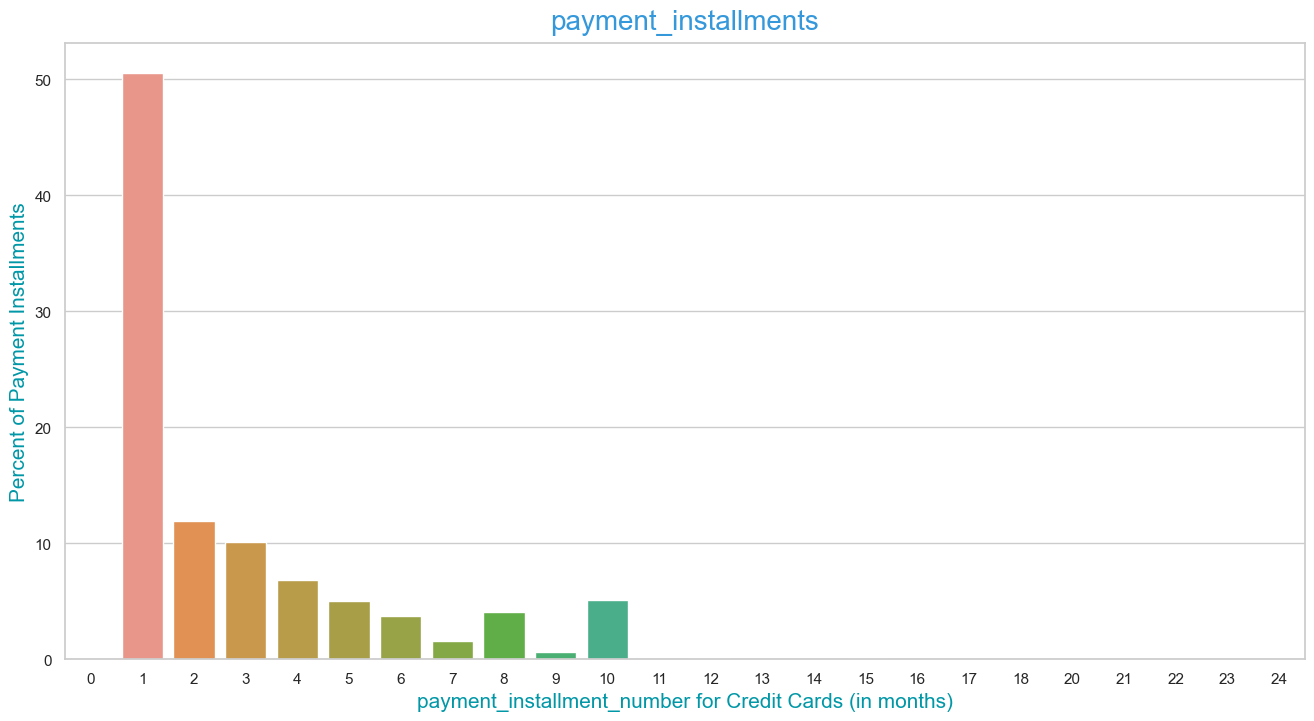

In [140]:
plt.figure(figsize=(16, 8)) 

sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters

# Barplot for the 'payment_installments' column.

sns.barplot(x = pay_inst_df['number_of_installments(in months)'],y = pay_inst_df['percent_of_number_of_payments'], data = pay_inst_df) # Plotting countplot
plt.title('payment_installments' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('payment_installment_number for Credit Cards (in months)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Percent of Payment Installments', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

plt.show()

Comment 1 : More than 50% , 12 %  of customers has made their payments by opting for 1 month and 2 month installment respectively using their credit card.


In [141]:
df_payments.loc[df_payments['order_id']=='683bf306149bb869980b68d48a1bd6ab',:]

,order_id,payment_type,payment_installments,payment_value
385,683bf306149bb869980b68d48a1bd6ab,voucher,1,30.0
1456,683bf306149bb869980b68d48a1bd6ab,credit_card,1,9.0


In [142]:
df_payments.loc[df_payments['order_id']=='e6a66a8350bb88497954d37688ab123e',:]

,order_id,payment_type,payment_installments,payment_value
826,e6a66a8350bb88497954d37688ab123e,voucher,1,8.0
2324,e6a66a8350bb88497954d37688ab123e,voucher,1,11.0
16289,e6a66a8350bb88497954d37688ab123e,voucher,1,17.0
39743,e6a66a8350bb88497954d37688ab123e,voucher,1,5.0
42000,e6a66a8350bb88497954d37688ab123e,voucher,1,6.0
45326,e6a66a8350bb88497954d37688ab123e,voucher,1,16.0
71825,e6a66a8350bb88497954d37688ab123e,voucher,1,19.0
96318,e6a66a8350bb88497954d37688ab123e,voucher,1,10.0


Based on the above cell ,order_id can have multiple payment type 

In [143]:
# To analyze patterns in payment behavior within individual orders, divide the data into groups based on order ID and payment type
df_payments_temp=df_payments.groupby('order_id')['payment_type'].count().reset_index()

In [144]:
df_payments_temp.sort_values(by=['payment_type'],ascending=False)

,order_id,payment_type
97261,fa65dad1b0e818e3ccc5cb0e39231352,29
79611,ccf804e764ed5650cd8759557269dc13,26
15577,285c2e15bebd4ac83635ccc563dc71f4,22
53168,895ab968e7bb0d5659d16cd74cd1650c,21
99020,fedcd9f7ccdc8cba3a18defedd1a5547,19
...,...,...
33697,56bd45163229b35ca0ab490c1e3d3233,1
33696,56bc98e6d5b88c2cdb905f2fbec2ca3a,1
33695,56bbc7d92e6e74b8782abbf5ee336a92,1
33694,56bafc014f8ed2f34cfe598592c65fd8,1


In [145]:
df_payments=df_payments.groupby(['order_id','payment_type'])[['payment_installments', 'payment_value' ]].agg(
    {'payment_installments': 'count', 'payment_value': 'sum' }
).sort_values(by=['payment_type'],ascending=False)

In [146]:
df_payments=df_payments.sort_values(by=['payment_type'],ascending=False).reset_index()

In [147]:
df_payments.groupby('order_id')['payment_type'].count().reset_index()

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1
99436,fffcd46ef2263f404302a634eb57f7eb,1
99437,fffce4705a9662cd70adb13d4a31832d,1
99438,fffe18544ffabc95dfada21779c9644f,1


In [148]:
df_payments.sort_values(by=['payment_type'],ascending=False)

,order_id,payment_type,payment_installments,payment_value
0,92e50fc63b89872b2d7aae1c07b64d97,wallet,1,275.0
13189,34eb84795617859f326a6615f0fff940,wallet,1,89.0
13196,34f336174dc7538b2fe8d1b6098d76ca,wallet,1,37.0
13195,34f1e1534ff3a9055146407b5fc8e790,wallet,1,67.0
13194,34f054dbc6acae464a192cbf2083cf72,wallet,1,82.0
...,...,...,...,...
50681,61e268eee1d131498001b6121895c5ee,credit_card,1,246.0
50680,61e0716d18d338f3eba2c3071e982f18,credit_card,1,40.0
50679,61e94ee01643283937897275a00ed8ff,credit_card,1,165.0
50678,61cabe0c7863902624818230a6b61a17,credit_card,1,148.0


In [149]:
df_payments.loc[df_payments['order_id']=='fa65dad1b0e818e3ccc5cb0e39231352',:]

,order_id,payment_type,payment_installments,payment_value
23140,fa65dad1b0e818e3ccc5cb0e39231352,voucher,29,459.0


In [150]:
df_payments.loc[df_payments['order_id']=='683bf306149bb869980b68d48a1bd6ab',:]

,order_id,payment_type,payment_installments,payment_value
22566,683bf306149bb869980b68d48a1bd6ab,voucher,1,30.0
45950,683bf306149bb869980b68d48a1bd6ab,credit_card,1,9.0


In [151]:
df_payments.shape

(101686, 4)

Identifying outliers and examining numerical fields

In [152]:
payments_num = df_payments[[ 'payment_installments', 'payment_value']]
payments_num.describe(percentiles = [0, 0.01 ,0.1, 0.25, 0.5, 0.75, 0.90, 0.99, 1])  ## Check the statistical summary fo

,payment_installments,payment_value
count,101686.000000,101686.00000
mean,1.021635,157.43833
std,0.322295,219.88199
min,1.000000,0.00000
0%,1.000000,0.00000
1%,1.000000,15.00000
10%,1.000000,37.00000
25%,1.000000,59.00000
50%,1.000000,102.00000
75%,1.000000,174.00000


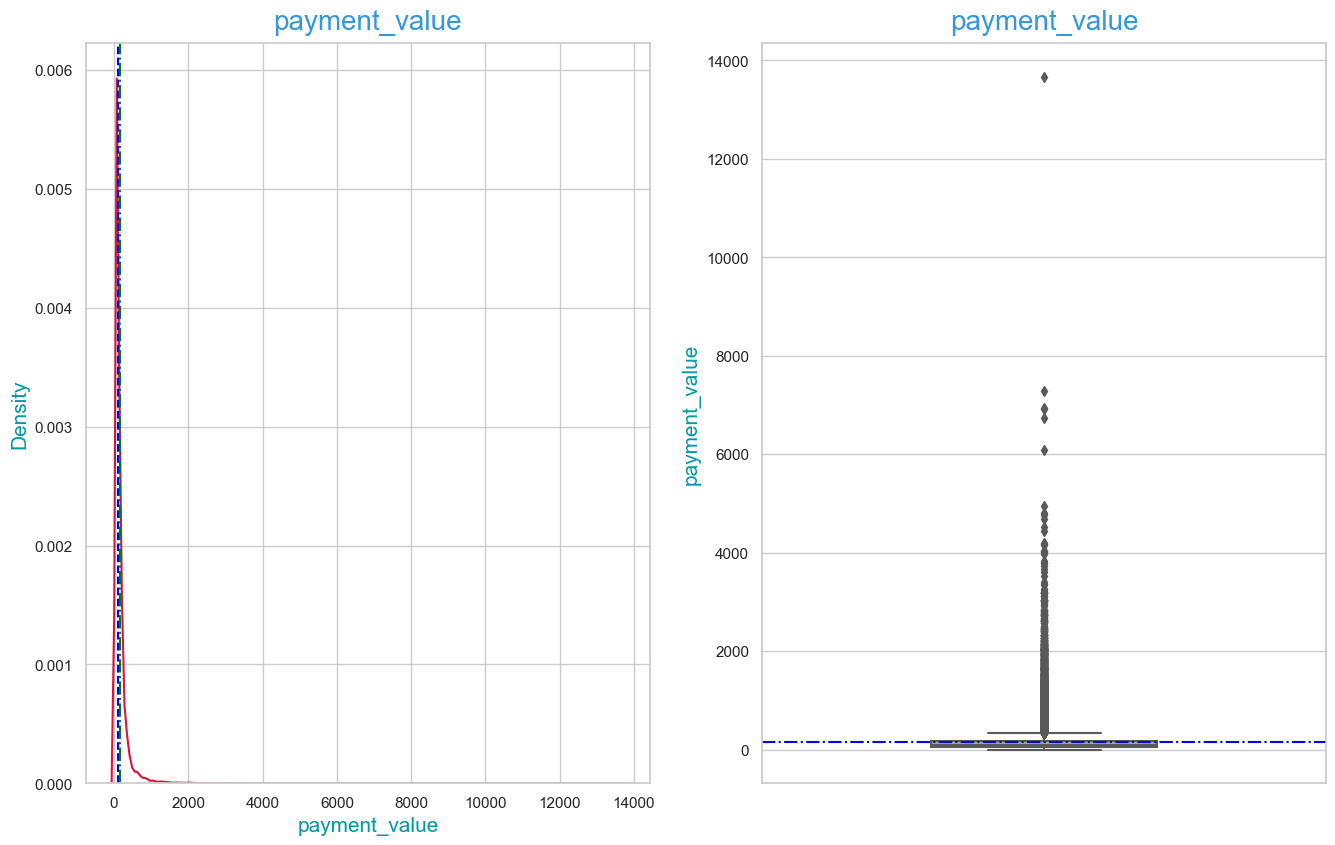

In [153]:
# Plotting the subplot of boxplots for all numerical variables in the dataset.
plt.figure(figsize=(16, 10)) 
plt.subplots_adjust(top=0.85, wspace= 0.2, hspace= 0.2)  ## setting the width of the padding between subplots

colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
pal = sns.color_palette(colors,10,1)

sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters


# Distplot for the 'payment_value' column.
plt.subplot(1,2,1)
sns.distplot(df_payments.payment_value, kde=True, hist=False, color= 'Crimson') # Plotting distplot
plt.axvline(df_payments.payment_value.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(df_payments.payment_value.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('payment_value' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('payment_value', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'payment_value' column.
plt.subplot(1,2,2)
sns.boxplot(y = 'payment_value', data = df_payments, width=0.4, color= 'DarkKhaki') # Plotting boxplot
plt.axhline(df_payments.payment_value.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('payment_value' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('payment_value', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

plt.show()

In [154]:
# Checking how many items most of the customers purchase 
pay_inst_df=pd.DataFrame(df_payments['payment_installments'].value_counts())
pay_inst_df['percent_of_number_of_orders']=round(df_payments['payment_installments'].value_counts(normalize=True),4)*100
pay_inst_df=pay_inst_df.reset_index()
pay_inst_df.columns=['number_of_installments(in months)','number_of_payments','percent_of_number_of_payments']
pay_inst_df

,number_of_installments(in months),number_of_payments,percent_of_number_of_payments
0,1,100595,98.93
1,2,727,0.71
2,3,148,0.15
3,4,79,0.08
4,5,40,0.04
5,6,30,0.03
6,7,17,0.02
7,8,14,0.01
8,10,8,0.01
9,11,8,0.01


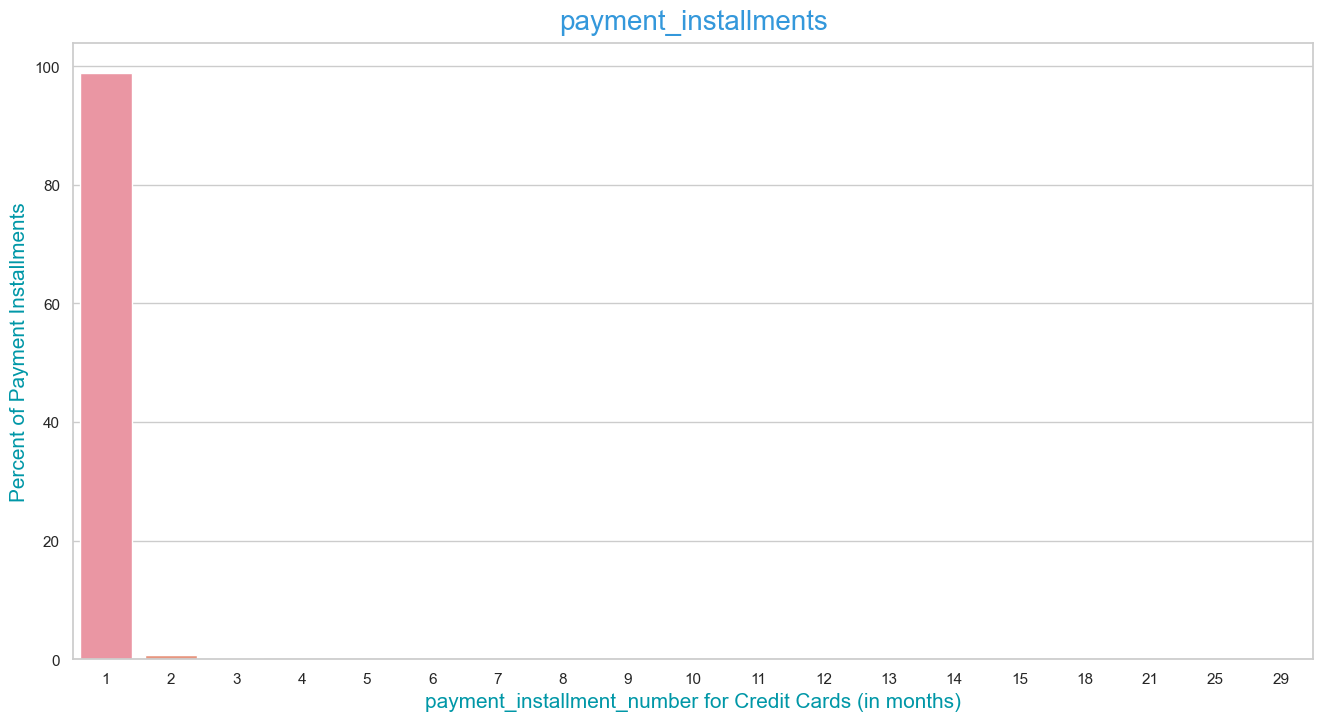

In [155]:
plt.figure(figsize=(16, 8)) 

sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters

# Barplot for the 'payment_installments' column.

sns.barplot(x = pay_inst_df['number_of_installments(in months)'],y = pay_inst_df['percent_of_number_of_payments'], data = pay_inst_df) # Plotting countplot
plt.title('payment_installments' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('payment_installment_number for Credit Cards (in months)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Percent of Payment Installments', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

plt.show()

#  Joining  payment table with main table 

In [156]:
df_ordcustpay_merge=pd.merge(df_ordcust_merge,df_payments,on='order_id',how='left')

In [157]:
df_ordcustpay_merge.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,customer_city,customer_state,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,sao paulo,SP,voucher,2.0,21.0
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,sao paulo,SP,credit_card,1.0,18.0
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,119,23,1,barreiras,BA,wallet,1.0,141.0
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415,160,19,1,vianopolis,GO,credit_card,1.0,179.0
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0,45,27,1,sao goncalo do amarante,RN,credit_card,1.0,72.0


In [158]:
df_ordcustpay_merge.shape

(102398, 15)

In [159]:
df_ordcust_merge.shape

(100123, 12)

In [160]:
 df_ordcust_merge.duplicated().any()

False

In [161]:
df_ordcustpay_merge.isnull().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
product_id                       0
price                            0
shipping_charges                 0
order_item_id                    0
customer_city                    0
customer_state                   0
payment_type                     1
payment_installments             1
payment_value                    1
dtype: int64

In [162]:
# for this order payment details were not present and count is one so dropping this row
df_ordcustpay_merge[df_ordcustpay_merge.isnull().any(axis=1)]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,customer_city,customer_state,payment_type,payment_installments,payment_value
31638,bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,135,9,6,sao joaquim da barra,SP,NaN,NaN,NaN


In [163]:
df_ordcustpay_merge=df_ordcustpay_merge.dropna()

In [164]:
# checking 
df_ordcustpay_merge[df_ordcustpay_merge.isnull().any(axis=1)]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,customer_city,customer_state,payment_type,payment_installments,payment_value


In [165]:
# checking for null values
df_ordcustpay_merge.isnull().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
product_id                       0
price                            0
shipping_charges                 0
order_item_id                    0
customer_city                    0
customer_state                   0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

 Increase in  price sum is due to the fact that each orderid with different payment type is added in the main table which adds the price .


# Product table  

In [166]:
# PRoduct table data cleaning

In [167]:
# Read all the information about raw data
df_products=pd.read_excel('Retail_dataset.xlsx', sheet_name=6) 

In [168]:
df_products.shape ## Checking the number of rows and columns in the dataframe

(32951, 6)

In [169]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


Comment 1 : In the first glimpse, we can notice that there may be missing values in this dataset.

Comment 2 : Datatype of variables are correct in products dataframe.

In [170]:
df_products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [171]:
df_products.duplicated().any()

False

In [172]:
Value_Count(df_products)

product_id                                   Total  Percent
product_id                                      
1e9e8ef04dbcff4541ed26657ea517e5      1      0.0
d05cc9afc85771f597cf4bc9d8f12546      1      0.0
71b7afd92c42feab780d5ea512fc7348      1      0.0
5c5f3e091101bea69642eb3dd145b17d      1      0.0
16d47089f9bc7f16de16cc4bd3b9dd49      1      0.0
...                                 ...      ...
c154987c6780d1a2b579aae00e53485f      1      0.0
1a6c9da4039deae58c2b769f049ae121      1      0.0
4cb35e544a1de008f37e069f172f964e      1      0.0
b34b2c889f5b26963569cf421254e121      1      0.0
106392145fca363410d287a815be6de4      1      0.0

[32951 rows x 2 columns] 


product_category_name                                    Total  Percent
product_category_name                            
toys                               24725    75.42
bed_bath_table                       789     2.41
sports_leisure                       721     2.20
furniture_decor                      687     2.10
h

In [173]:
df_products['product_category_name'].mode()[0]

'toys'

Comment 1 : More than 75% of products sold are toys and rest products categories constitutes 25% of olist business.

In [174]:
df_products.isnull().sum()/len(df_products)*100

product_id               0.000000
product_category_name    0.515918
product_weight_g         0.006070
product_length_cm        0.006070
product_height_cm        0.006070
product_width_cm         0.006070
dtype: float64

In [175]:
df_products[df_products['product_category_name'].isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...
8149,17823ffd2de8234f0e885a71109613a4,NaN,3750.0,42.0,20.0,24.0
8203,c230b471b7e21ff9060e68ee154afd70,NaN,200.0,16.0,5.0,11.0
8230,fe34503c6bccf918db601aaafd4a975a,NaN,3000.0,16.0,21.0,19.0
8291,0c877471e35049402bca235e06cb8063,NaN,10750.0,34.0,20.0,30.0


In [176]:
df_orders_merge.loc[df_orders_merge['order_id']=='17823ffd2de8234f0e885a71109613a4',:]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id


since no relevant data is found in df_orders_merge hence dropping product_category_name   with null values

In [177]:
# Filling the null values with mode
df_products['product_category_name'].fillna("other", inplace=True)

In [178]:
df_products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [179]:
 df_products[df_products['product_weight_g'].isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,toys,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,toys,NaN,NaN,NaN,NaN


In [180]:
# Filter for toy products
toy_products = df_products[df_products['product_category_name'] == 'toys']

# Fill NA values at index 8578 using mean values from other toy products
toy_products.loc[8578, ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = \
    toy_products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].mean(skipna=True)

# Alternatively, using median:
# toy_products.loc[8578, [...]] = toy_products[...].median(skipna=True)

# Update the original DataFrame with the filled values
df_products.update(toy_products)

In [181]:
# Filter for toy products
toy_products = df_products[df_products['product_category_name'] == 'toys']

# Fill NA values at index 8578 using mean values from other toy products
toy_products.loc[18851, ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = \
    toy_products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].mean(skipna=True)

# Alternatively, using median:
# toy_products.loc[8578, [...]] = toy_products[...].median(skipna=True)

# Update the original DataFrame with the filled values
df_products.update(toy_products)

In [182]:
df_products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [183]:
df_products['product_id'].nunique()

32951

In [184]:
df_products.shape

(32951, 6)

Identifying outliers and examining numerical fields

In [185]:
products_num = df_products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]
products_num.describe(percentiles = [0, 0.01 ,0.1, 0.25, 0.5, 0.75, 0.90, 0.99, 1])  ## Check the statistical summary for the n

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000
mean,2276.472742,30.815077,16.937671,23.196731
std,4281.908773,16.913945,13.637140,12.078681
min,0.000000,7.000000,2.000000,6.000000
0%,0.000000,7.000000,2.000000,6.000000
1%,60.000000,16.000000,2.000000,11.000000
10%,175.000000,16.000000,4.000000,11.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000


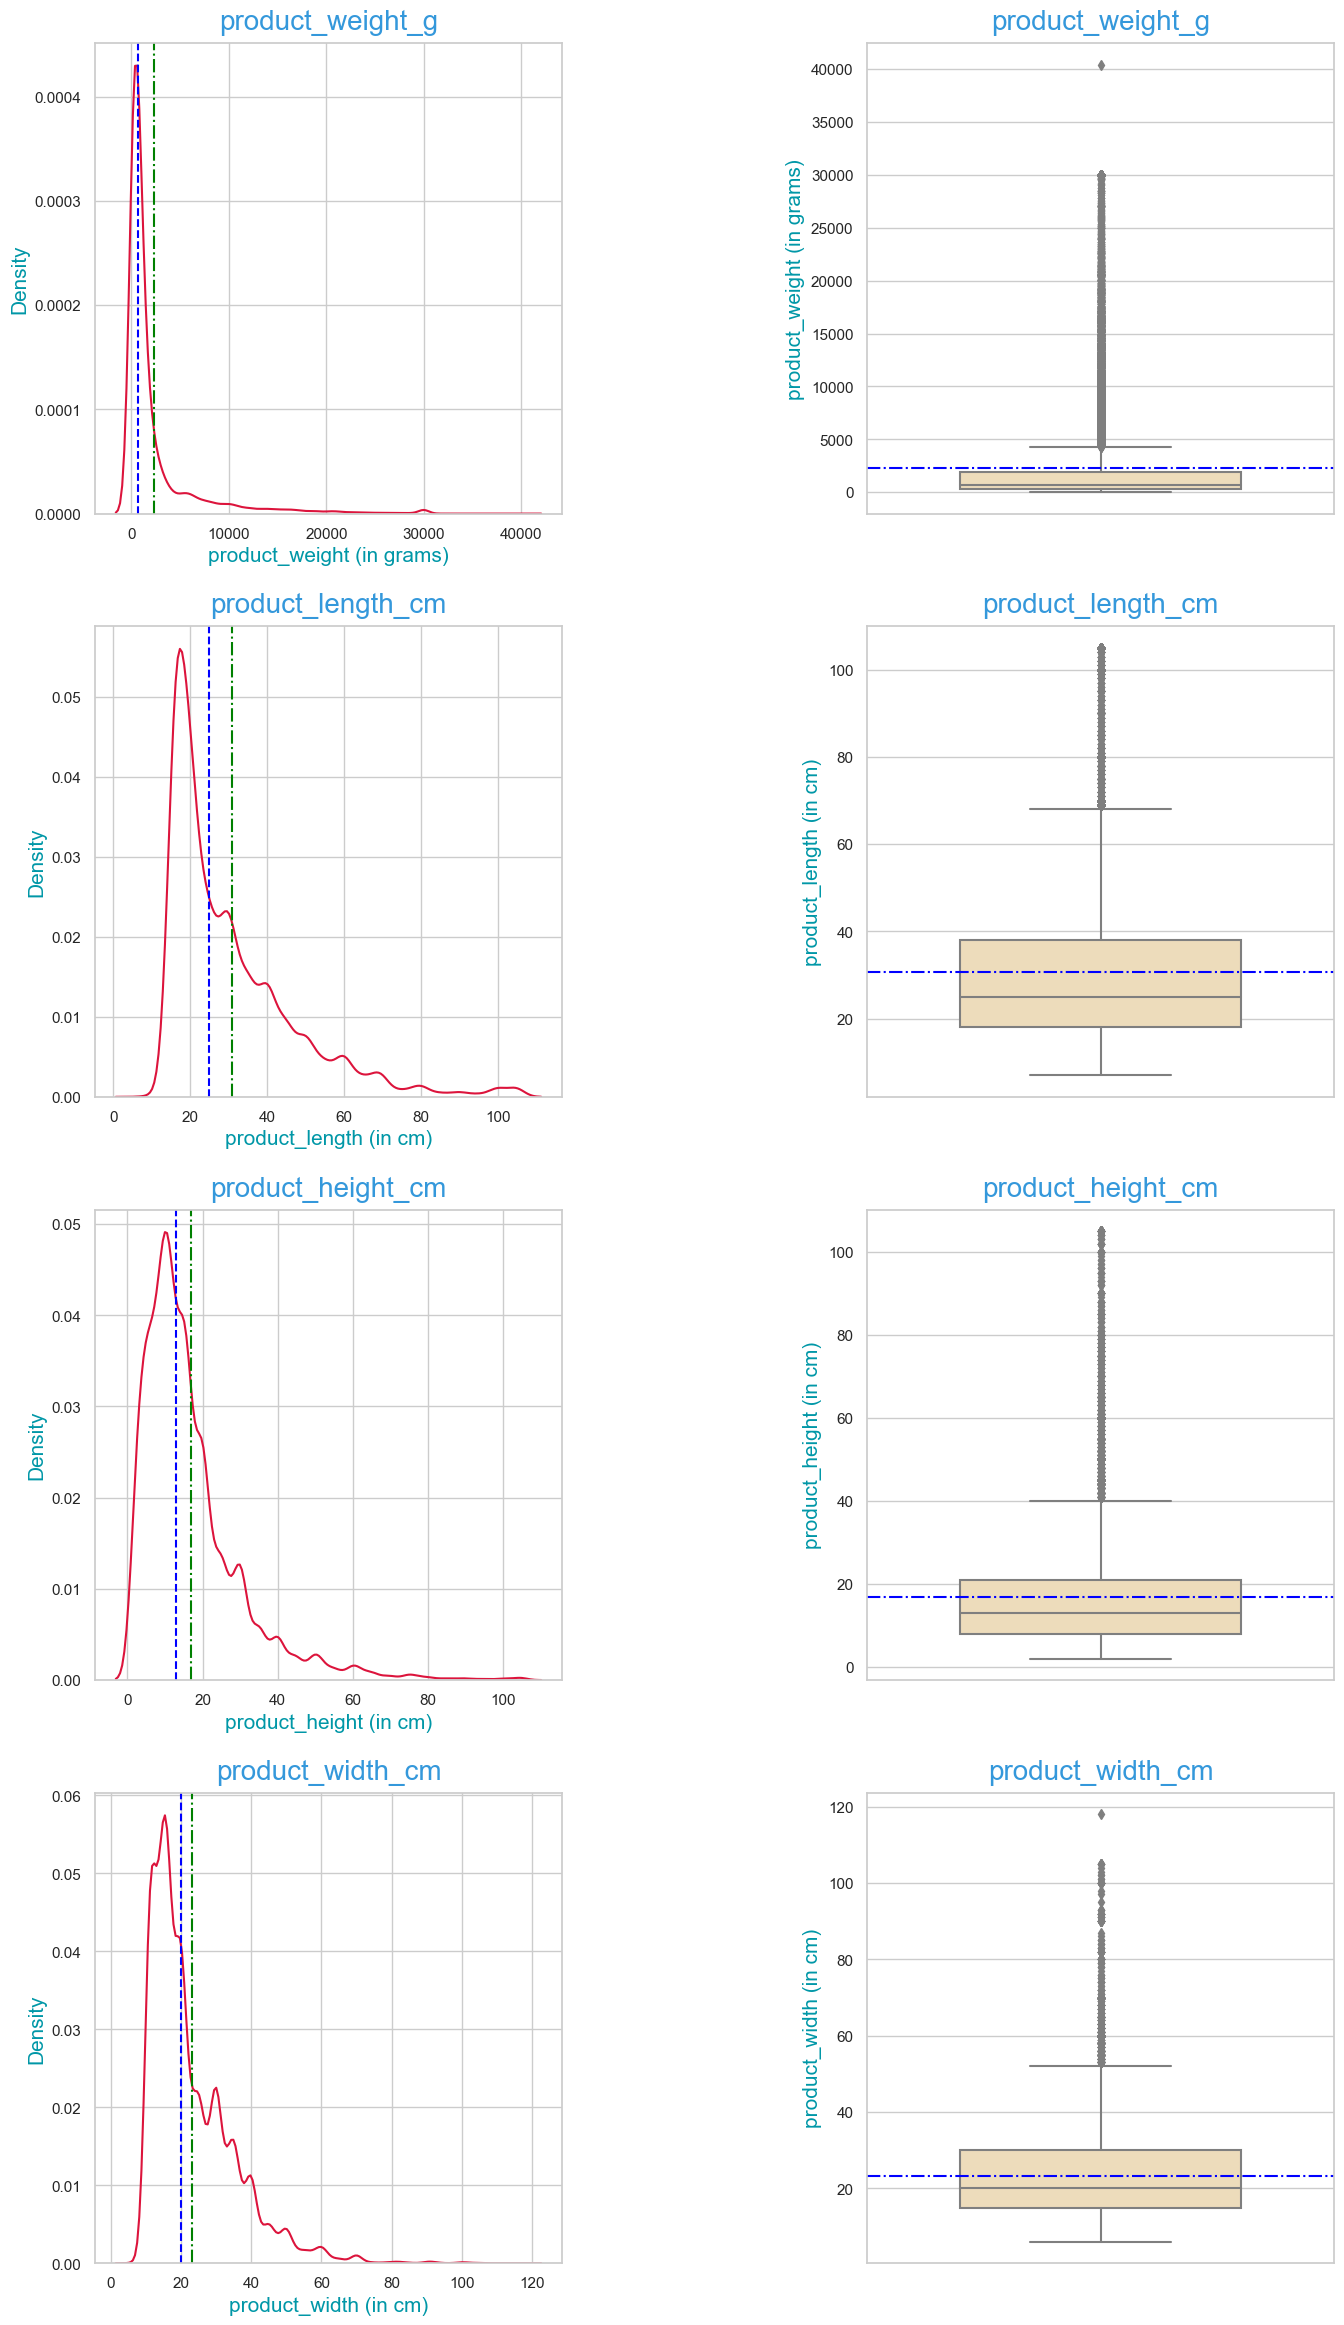

In [186]:
# Plotting the subplot of distplots and boxplots for all numerical variables in the dataset.

plt.figure(figsize=(16, 30)) 
plt.subplots_adjust(top=0.85, wspace= 0.65, hspace= 0.24)  ## setting the width of the padding between subplots

colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
pal = sns.color_palette(colors,10,1)

sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters


# Distplot for the 'product_weight_g' column.
plt.subplot(4,2,1)
sns.distplot(df_products.product_weight_g, color= 'Crimson', kde=True, hist=False) # Plotting distplot
plt.axvline(df_products.product_weight_g.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(df_products.product_weight_g.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('product_weight_g' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('product_weight (in grams)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'product_weight_g' column.
plt.subplot(4,2,2)
sns.boxplot(y = 'product_weight_g', data = df_products, width=0.6, color= 'Wheat') # Plotting boxplot
plt.axhline(df_products.product_weight_g.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('product_weight_g' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('product_weight (in grams)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Distplot for the 'product_length_cm' column.
plt.subplot(4,2,3)
sns.distplot(df_products.product_length_cm, kde=True, hist=False, color= 'Crimson') # Plotting distplot
plt.axvline(df_products.product_length_cm.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(df_products.product_length_cm.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('product_length_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('product_length (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'product_length_cm' column.
plt.subplot(4,2,4)
sns.boxplot(y = 'product_length_cm', data = df_products, width=0.6, color= 'Wheat') # Plotting boxplot
plt.axhline(df_products.product_length_cm.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('product_length_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('product_length (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Distplot for the 'product_height_cm' column.
plt.subplot(4,2,5)
sns.distplot(df_products.product_height_cm, kde=True, hist=False, color= 'Crimson') # Plotting distplot
plt.axvline(df_products.product_height_cm.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(df_products.product_height_cm.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('product_height_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('product_height (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'product_height_cm' column.
plt.subplot(4,2,6)
sns.boxplot(y = 'product_height_cm', data = df_products, width=0.6, color= 'Wheat') # Plotting boxplot
plt.axhline(df_products.product_height_cm.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('product_height_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('product_height (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Distplot for the 'product_width_cm' column.
plt.subplot(4,2,7)
sns.distplot(df_products.product_width_cm, kde=True, hist=False, color= 'Crimson') # Plotting distplot
plt.axvline(df_products.product_width_cm.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(df_products.product_width_cm.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('product_width_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('product_width (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'product_width_cm' column.
plt.subplot(4,2,8)
sns.boxplot(y = 'product_width_cm', data = df_products, width=0.6, color= 'Wheat') # Plotting boxplot
plt.axhline(df_products.product_width_cm.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('product_width_cm' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('product_width (in cm)', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

plt.show()

Comment 1 : In all of the above attributes, we can observe that data is highly skewed towards positive side which indicates that we have outliers on the higher side.

Comment 1 : In all of the above attributes, we can observe that data is highly skewed towards positive side which indicates that we have outliers on the higher side.

In [187]:
# Creating product_volume_in_cubic_cm column in product table
df_products['Volume_litres'] = (df_products['product_length_cm']*df_products['product_width_cm']*df_products['product_height_cm'])/ 1000 
# converting product volume columncm3 to lites


In [188]:
products_num = df_products[['Volume_litres', 'product_width_cm']]
products_num.describe(percentiles = [0, 0.01 ,0.1, 0.25, 0.5, 0.75, 0.90, 0.99, 1])  ## Check the statistical summary for the n

,Volume_litres,product_width_cm
count,32951.000000,32951.000000
mean,16.563834,23.196731
std,27.056241,12.078681
min,0.168000,6.000000
0%,0.168000,6.000000
1%,0.352000,11.000000
10%,1.350000,11.000000
25%,2.880000,15.000000
50%,6.840000,20.000000
75%,18.480000,30.000000


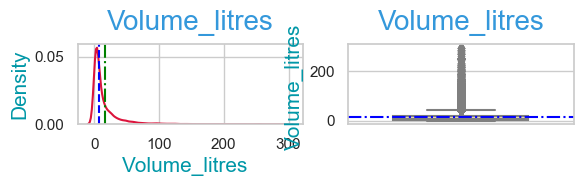

In [189]:
# Distplot for the 'product_width_cm' column.
plt.subplot(4,2,7)
sns.distplot(df_products.Volume_litres, kde=True, hist=False, color= 'Crimson') # Plotting distplot
plt.axvline(df_products.Volume_litres.mean(), color="green", linestyle='-.', label='mean') # Mean vertical line
plt.axvline(df_products.Volume_litres.median(), color="blue", linestyle='--', label='median') # Median vertical line
plt.title('Volume_litres' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.xlabel('Volume_litres  ', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
plt.ylabel('Density', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label


# Box plot for the 'product_width_cm' column.
plt.subplot(4,2,8)
sns.boxplot(y = 'Volume_litres', data = df_products, width=0.6, color= 'Wheat') # Plotting boxplot
plt.axhline(df_products.Volume_litres.mean(), color="blue", linestyle='-.', label='mean') # Mean horizontal line
plt.title('Volume_litres' , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
plt.ylabel('Volume_litres ', fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label

plt.show()

In [190]:
# # Checking Outliers
# sns.boxplot(df_products['product_weight_g'])
# plt.show()
 

In [191]:
Q1 = df_products['product_weight_g'].quantile(0.25)
Q3 = df_products['product_weight_g'].quantile(0.75)
IQR = Q3 - Q1
df_products = df_products[(df_products['product_weight_g'] < Q1 - 1.5 * IQR) | (df_products['product_weight_g'] > Q3 + 1.5 * IQR)]

<Axes: >

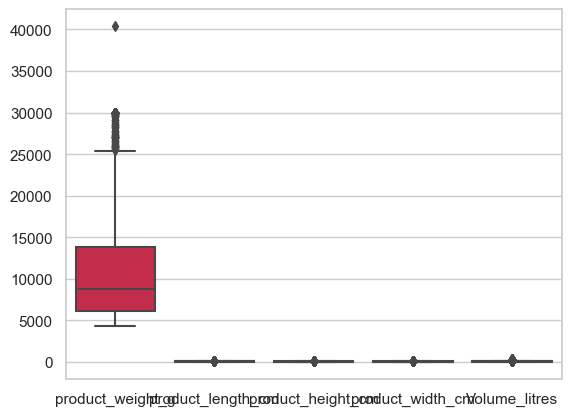

In [192]:
sns.boxplot(df_products)

# Joining product table with main table

In [193]:
df_merge=pd.merge(df_ordcustpay_merge,df_products,on='product_id',how='left')

In [194]:
df_merge.shape

(102397, 21)

In [195]:
df_merge.isnull().sum()

order_id                             0
customer_id                          0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_timestamp            0
order_estimated_delivery_date        0
product_id                           0
price                                0
shipping_charges                     0
order_item_id                        0
customer_city                        0
customer_state                       0
payment_type                         0
payment_installments                 0
payment_value                        0
product_category_name            88433
product_weight_g                 88433
product_length_cm                88433
product_height_cm                88433
product_width_cm                 88433
Volume_litres                    88433
dtype: int64

In [196]:
df_merge.duplicated().any()

False

In [197]:
df_merge=df_merge.drop_duplicates()
df_merge.duplicated().any()

False

In [198]:
df_merge.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,...,customer_state,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Volume_litres
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,...,SP,voucher,2.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,...,SP,credit_card,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,119,23,1,...,BA,wallet,1.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415,160,19,1,...,GO,credit_card,1.0,179.0,NaN,NaN,NaN,NaN,NaN,NaN
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0,45,27,1,...,RN,credit_card,1.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
df_merge.price.sum()

13492421

In [200]:
df_merge.groupby('order_id')[['product_category_name']].count().reset_index().sort_values(by=['product_category_name' ],ascending=False)
# with this we can confirm each order id has combined with product category name

,order_id,product_category_name
13650,2455cbeb73fd04b170ca2504662f95ce,6
66761,b1a7bd6a9d10076c91e88bc510406b46,4
59141,9deec776b35252a1660b2439abeb9e38,4
60707,a1fa82769a203e30b8faf81cd32e5193,4
37402,637617b3ffe9e2f7a2411243829226d0,4
...,...,...
34471,5bd12089d3beaa286c0faa3f596d0c89,0
34470,5bd09c25c13fd88f4f9928d25cba13e3,0
34468,5bd04e944fbdeb94cb04e86654501cfb,0
34467,5bcf5ca118d9e81440bf98e26c943255,0


In [201]:
# df_ordcustpaypro_merge=df_ordcustpaypro_merge.dropna()

In [202]:
df_merge[df_merge['product_category_name'].isna()]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,...,customer_state,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Volume_litres
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,...,SP,voucher,2.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,...,SP,credit_card,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,119,23,1,...,BA,wallet,1.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415,160,19,1,...,GO,credit_card,1.0,179.0,NaN,NaN,NaN,NaN,NaN,NaN
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0,45,27,1,...,RN,credit_card,1.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102389,aa04ef5214580b06b10e2a378300db44,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-02-07 13:15:25,2017-03-17,9fc063fd34fed29ccc57b7f8e8d03388,370,19,1,...,MG,voucher,1.0,250.0,NaN,NaN,NaN,NaN,NaN,NaN
102390,aa04ef5214580b06b10e2a378300db44,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-02-07 13:15:25,2017-03-17,9fc063fd34fed29ccc57b7f8e8d03388,370,19,1,...,MG,credit_card,1.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN
102391,880675dff2150932f1601e1c07eadeeb,831ce3f1bacbd424fc4e38fbd4d66d29,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-06 11:08:08,2017-03-22,ea73128566d1b082e5101ce46f8107c7,140,16,1,...,SP,credit_card,1.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN
102392,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,ac35486adb7b02598c182c2ff2e05254,72,13,1,...,SP,credit_card,1.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
df_orders_merge.loc[df_orders_merge['order_id']=='e481f51cbdc54678b7cc49136f2d6af7',:]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1


In [204]:
df_merge['product_category_name'].fillna("Others", inplace=True)

# Now, all null values in 'product_category_name' will be replaced with "Others"

In [205]:
df_merge.isna().sum()

order_id                             0
customer_id                          0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_timestamp            0
order_estimated_delivery_date        0
product_id                           0
price                                0
shipping_charges                     0
order_item_id                        0
customer_city                        0
customer_state                       0
payment_type                         0
payment_installments                 0
payment_value                        0
product_category_name                0
product_weight_g                 88433
product_length_cm                88433
product_height_cm                88433
product_width_cm                 88433
Volume_litres                    88433
dtype: int64

dropping columns product_weight_g product_length_cm  product_height_cm  product_width_cm  has their is no significant impact on further analysis                                            

In [206]:
df_merge=df_merge.drop(['product_weight_g', 'product_length_cm', 'product_height_cm','product_width_cm'], axis=1)

In [207]:
df_merge['Volume_litres'].fillna(df_merge['Volume_litres'].median(), inplace=True)

In [208]:
df_merge.isna().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
product_id                       0
price                            0
shipping_charges                 0
order_item_id                    0
customer_city                    0
customer_state                   0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
Volume_litres                    0
dtype: int64

In [209]:
# creating revenue column
df_merge['revenue']=(df_merge['price']*df_merge['order_item_id'])+df_merge['shipping_charges']

In [210]:
df_merge.shape

(102397, 18)

In [211]:
df_merge.duplicated().any()

False

In [212]:
df_merge.price.sum()

13492421

# Data Transformation

In [213]:
#  Create time-based features

In [214]:
df=df_merge

In [215]:
df.shape

(102397, 18)

In [216]:

df['order_estimated_delivery_date'] =df['order_estimated_delivery_date'].dt.date
df['order_purchase_timestamp'] =df['order_purchase_timestamp'].dt.date

In [217]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'product_id', 'price',
       'shipping_charges', 'order_item_id', 'customer_city', 'customer_state',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'Volume_litres', 'revenue'],
      dtype='object')

In [218]:
df.dtypes

order_id                                 object
customer_id                              object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_timestamp                object
order_estimated_delivery_date            object
product_id                               object
price                                     int64
shipping_charges                          int64
order_item_id                             int64
customer_city                            object
customer_state                           object
payment_type                             object
payment_installments                    float64
payment_value                           float64
product_category_name                    object
Volume_litres                           float64
revenue                                   int64
dtype: object

In [219]:
df.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,customer_city,customer_state,payment_type,payment_installments,payment_value,product_category_name,Volume_litres,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,sao paulo,SP,voucher,2.0,21.0,Others,43.4,39
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,sao paulo,SP,credit_card,1.0,18.0,Others,43.4,39
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,119,23,1,barreiras,BA,wallet,1.0,141.0,Others,43.4,142
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415,160,19,1,vianopolis,GO,credit_card,1.0,179.0,Others,43.4,179
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0,45,27,1,sao goncalo do amarante,RN,credit_card,1.0,72.0,Others,43.4,72


In [220]:
df['order_approved_at'].dtype

dtype('<M8[ns]')

In [221]:
# Convert input data into datetime objects, enabling date-based analysis and manipulation.
df['order_approved_at']=pd.to_datetime(df['order_approved_at'])
df['order_delivered_timestamp']=pd.to_datetime(df['order_delivered_timestamp'])
df['order_estimated_delivery_date']=pd.to_datetime(df['order_estimated_delivery_date'])
df['order_purchase_timestamp']=pd.to_datetime(df['order_purchase_timestamp'])

In [222]:
# creating column based on date diff between order_delivered_timestamp and order_purchase_timestamp day

In [223]:
df['date_diff'] = df['order_delivered_timestamp']-df['order_purchase_timestamp']

In [224]:
df.head(3)

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,customer_city,customer_state,payment_type,payment_installments,payment_value,product_category_name,Volume_litres,revenue,date_diff
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,sao paulo,SP,voucher,2.0,21.0,Others,43.4,39,8 days 21:25:13
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,30,9,1,sao paulo,SP,credit_card,1.0,18.0,Others,43.4,39,8 days 21:25:13
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,119,23,1,barreiras,BA,wallet,1.0,141.0,Others,43.4,142,14 days 15:27:45


In [225]:

df['order_purchase_year']= df['order_purchase_timestamp'].dt.year
df['order_approved_year']=df['order_approved_at'].dt.year
df['order_delivered_year'] =df['order_delivered_timestamp'].dt.year
df['order_estimated_delivery_year'] =df['order_estimated_delivery_date'].dt.year

In [226]:
df.shape

(102397, 23)

In [227]:
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:"Nov", 12: 'Dec'}

df['Purchase_Month']=df['order_purchase_timestamp'].dt.month.map(month_names)
df['Approval_Ord_month'] = df['order_approved_at'].dt.month.map(month_names)
df['delivered_month'] =df['order_delivered_timestamp'].dt.month.map(month_names)
df['estimated_delivery_month'] =df['order_estimated_delivery_date'].dt.month.map(month_names)

In [228]:
df['purchase_Day']= df['order_purchase_timestamp'].dt.day
df['approved_Day']=df['order_approved_at'].dt.day
df['delivered_Day'] =df['order_delivered_timestamp'].dt.day
df['estimated_delivery_Day'] =df['order_estimated_delivery_date'].dt.day


In [229]:
df.tail()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,...,order_delivered_year,order_estimated_delivery_year,Purchase_Month,Approval_Ord_month,delivered_month,estimated_delivery_month,purchase_Day,approved_Day,delivered_Day,estimated_delivery_Day
102392,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,ac35486adb7b02598c182c2ff2e05254,72,13,1,...,2017,2017,Mar,Mar,Mar,Mar,9,9,17,28
102393,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,2018-02-06,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,f1d4ce8c6dd66c47bbaa8c6781c2a923,175,20,1,...,2018,2018,Feb,Feb,Feb,Mar,6,6,28,2
102394,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,2017-08-27,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,b80910977a37536adeddd63663f916ad,206,65,1,...,2017,2017,Aug,Aug,Sep,Sep,27,27,21,27
102395,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,2018-01-08,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,d1c427060a0f73f6b889a5c7c61f2ac4,360,82,3,...,2018,2018,Jan,Jan,Jan,Feb,8,8,25,15
102396,66dea50a8b16d9b4dee7af250b4be1a5,60350aa974b26ff12caad89e55993bd6,2018-03-08,2018-03-09 11:20:28,2018-03-16 13:08:30,2018-04-03,006619bbed68b000c8ba3f8725d5409e,68,18,1,...,2018,2018,Mar,Mar,Mar,Apr,8,9,16,3


In [230]:
# Finding mismatches between purchase days and approved days  column
mismatches_day = df[df['purchase_Day'] != df['approved_Day']]

In [231]:
mismatches_day

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,...,order_delivered_year,order_estimated_delivery_year,Purchase_Month,Approval_Ord_month,delivered_month,estimated_delivery_month,purchase_Day,approved_Day,delivered_Day,estimated_delivery_Day
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,119,23,1,...,2018,2018,Jul,Jul,Aug,Aug,24,26,7,13
8,76c6e866289321a7c93b82b54852dc33,39382392765b6dc74812866ee5ee92a7,2017-01-23,2017-01-25 02:50:47,2017-02-02 14:08:10,2017-03-06,ac1789e492dcd698c5c10b97a671243a,20,16,1,...,2017,2017,Jan,Jan,Feb,Mar,23,25,2,6
13,82566a660a982b15fb86e904c8d32918,e97109680b052ee858d93a539597bba7,2018-06-07,2018-06-09 03:13:12,2018-06-19 12:05:52,2018-07-18,72a97c271b2e429974398f46b93ae530,32,18,1,...,2018,2018,Jun,Jun,Jun,Jul,7,9,19,18
16,dcb36b511fcac050b97cd5c05de84dc3,ccafc1c3f270410521c3c6f3b249870f,2018-06-07,2018-06-12 23:31:02,2018-06-21 15:34:32,2018-07-04,009c09f439988bc06a93d6b8186dce73,132,14,1,...,2018,2018,Jun,Jun,Jun,Jul,7,12,21,4
22,203096f03d82e0dffbc41ebc2e2bcfb7,d699688533772c15a061e8ce81cb56df,2017-09-18,2017-09-19 04:04:09,2017-10-09 22:23:46,2017-09-28,5ac9d9e379c606e36a8094a6046f75dc,110,9,1,...,2017,2017,Sep,Sep,Oct,Sep,18,19,9,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102363,71c4b7b8844a031b7db8ca41c41d4aae,6ca7990c03b703e57401911433372d1e,2017-09-03,2017-09-05 04:10:34,2017-09-14 15:49:47,2017-10-03,bd5556852920e0d5ebb6044894391ca6,34,15,1,...,2017,2017,Sep,Sep,Sep,Oct,3,5,14,3
102364,4a69678ecf74bfd34260031c04329b68,58a3b88ec0ed98474b1bb2630b277ed4,2018-07-22,2018-07-23 12:32:05,2018-07-24 22:46:38,2018-07-31,bc072f287b475a918c00b3478d1bcef9,159,13,1,...,2018,2018,Jul,Jul,Jul,Jul,22,23,24,31
102372,f9e3402be5a5ea63344347582ca9f45f,15b1c5678192a25402638f9bb93e9c02,2017-06-07,2017-06-08 02:45:24,2017-06-19 19:19:30,2017-07-05,5f21301936c11698db6aee5444190da0,150,15,1,...,2017,2017,Jun,Jun,Jun,Jul,7,8,19,5
102375,38e9133ce29f6bbe35aed9c3863dce01,a3983b8b6b679c9f645e6ef9517ac98d,2017-10-12,2017-10-14 03:28:24,2017-11-21 17:06:59,2017-10-31,014a8a503291921f7b004a5215bb3c36,37,12,1,...,2017,2017,Oct,Oct,Nov,Oct,12,14,21,31


In [232]:
# Finding mismatches between purchase days and approved month  column
mismatches_month = df[df['Purchase_Month'] != df['Approval_Ord_month']]

In [233]:
mismatches_month

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,...,order_delivered_year,order_estimated_delivery_year,Purchase_Month,Approval_Ord_month,delivered_month,estimated_delivery_month,purchase_Day,approved_Day,delivered_Day,estimated_delivery_Day
40,5acce57f8d9dfd55fa48e212a641a69d,f1f4f45c8602d0db1329eed1c8e935d4,2017-07-31,2017-08-02 02:56:02,2017-08-08 21:24:41,2017-08-22,0cd9f302c8a5b076ffa5c3567c6705fd,28,15,1,...,2017,2017,Jul,Aug,Aug,Aug,31,2,8,22
62,68873cf91053cd11e6b49a766db5af1a,6da92ae920ab16fc4eceb8fcd7bd43ce,2017-11-30,2017-12-02 02:51:18,2017-12-05 20:28:40,2017-12-18,15a9e834e89eab39d973492882c658d6,80,12,1,...,2017,2017,Nov,Dec,Dec,Dec,30,2,5,18
91,cadbb3657dac2dbbd5b84b12e7b78aad,cd148470c375939669971e8a032b16b4,2018-02-27,2018-03-01 02:48:54,2018-03-16 14:59:01,2018-03-29,9d2ff462feaaf88912539b8647e17ab4,395,15,1,...,2018,2018,Feb,Mar,Mar,Mar,27,1,16,29
107,a5474c0071dd5d1074e12d417078bbd0,0c8761c28faa9b9930e4a9bb545905da,2018-07-30,2018-08-01 02:50:15,2018-08-03 19:28:47,2018-08-02,1f75be631e988bb0ad750e60e18d043b,14,7,1,...,2018,2018,Jul,Aug,Aug,Aug,30,1,3,2
114,9d531c565e28c3e0d756192f84d8731f,efc37ae565ee0943cca2b89fc65c4d6f,2017-11-28,2017-12-01 09:31:15,2018-01-23 21:38:52,2017-12-22,807b2de93dbb064bbc82dc6ac963bc61,26,14,1,...,2018,2017,Nov,Dec,Jan,Dec,28,1,23,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102103,bfb1d0f7664c36a532d74c4cf0da37af,c106df929ba7c1b2dcbf7af4d0d60ee0,2017-08-31,2017-09-01 17:25:22,2017-09-11 20:45:01,2017-09-22,9aedf557945e816d48539ee56293f860,1200,41,1,...,2017,2017,Aug,Sep,Sep,Sep,31,1,11,22
102210,479a33fb572f8eded439d188871af158,cefe2e85b3d426b396a8098d58d7ca5e,2017-11-30,2017-12-02 15:50:44,2017-12-12 00:51:25,2017-12-27,c7b3cf9de7be95b3e09e7a63315685eb,100,36,1,...,2017,2017,Nov,Dec,Dec,Dec,30,2,12,27
102218,76a948cd55bf22799753720d4545dd2d,43aa3086b95f386b014b1b45de46554c,2018-01-30,2018-02-04 23:31:46,2018-03-18 20:08:50,2018-03-02,f81d3acffbaeeafa6f2a1a2f6d4a41ff,27,21,1,...,2018,2018,Jan,Feb,Mar,Mar,30,4,18,2
102241,017cf0b342401318dcaeb25478e13a6f,06b9d6221ccd83819ac6ad3f352854a9,2017-12-30,2018-01-04 23:17:29,2018-01-13 17:04:53,2018-02-01,368c6c730842d78016ad823897a372db,50,18,1,...,2018,2018,Dec,Jan,Jan,Feb,30,4,13,1


In [234]:
# Finding mismatches between purchase days and approved year  column
mismatches_year = df[df['order_purchase_year'] != df['order_approved_year']]

In [235]:
mismatches_year
# only 9 orders where orders placed on year end so dropping purchase_year and approved_year from this dataframe 

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,price,shipping_charges,order_item_id,...,order_delivered_year,order_estimated_delivery_year,Purchase_Month,Approval_Ord_month,delivered_month,estimated_delivery_month,purchase_Day,approved_Day,delivered_Day,estimated_delivery_Day
9145,b6133255f440562f2b6d004d1b24743d,88f21f18f1c3152b023a22a0f42bdab3,2017-12-31,2018-01-03 04:29:36,2018-01-05 18:55:46,2018-01-18,aadff88486740e0b0ebe2be6c09476ae,30,8,1,...,2018,2018,Dec,Jan,Jan,Jan,31,3,5,18
11413,ea4379fe06f33b88de9ffd4fcdddd6ba,fa3a5c745f1633b2e160f815c75f51c2,2017-12-31,2018-01-03 04:12:37,2018-01-11 18:57:27,2018-01-18,b1d207586fca400a2370d50a9ba1da98,149,8,1,...,2018,2018,Dec,Jan,Jan,Jan,31,3,11,18
11703,fa08d98c3578576e8ab56cb2bf8d94bd,9224f42be2222f18e321f84f8d67aa1f,2017-12-29,2018-01-03 04:18:30,2018-01-09 15:19:55,2018-01-24,d70c831282615555625658baeb52eaa6,35,12,1,...,2018,2018,Dec,Jan,Jan,Jan,29,3,9,24
12444,6e81be400198dabb3a353cc5c25f7fbf,be31a1e27da956701733eb601f0738ae,2017-12-30,2018-01-03 04:16:43,2018-01-08 17:19:31,2018-01-19,aca2eb7d00ea1a7b8ebd4e68314663af,75,13,1,...,2018,2018,Dec,Jan,Jan,Jan,30,3,8,19
13759,5dacd5be3242e33184345b90ae5ef770,57dbf5c301de35095ad94b4b8ebcab3a,2017-12-29,2018-01-03 04:32:29,2018-01-24 19:33:59,2018-02-06,8e4fb0a9a54c90bd6fcfde5e8df6a00c,69,15,1,...,2018,2018,Dec,Jan,Jan,Feb,29,3,24,6
17285,a3a334e8cd38b52f151585bfa1e22190,a31135408270af483420121a53765a94,2017-12-29,2018-01-03 04:29:41,2018-01-17 20:55:23,2018-02-05,1b4dee3e58cb87cb5a0acc54ea53db9d,85,14,1,...,2018,2018,Dec,Jan,Jan,Feb,29,3,17,5
19823,37439c69cc9254ad393066b4061ae5f2,743b49a24819c5f80b4240eda65c3b26,2017-12-30,2018-01-03 04:29:31,2018-01-18 17:33:17,2018-02-06,bda14a918da6a4fa9168277a57d59578,115,43,1,...,2018,2018,Dec,Jan,Jan,Feb,30,3,18,6
21198,eb0569e6b5aa37069775f4c0b4609104,5e65571d0f33dc17c099484ae3f25a4a,2017-12-29,2018-01-03 04:28:13,2018-01-15 22:46:52,2018-01-29,3e4176d545618ed02f382a3057de32b4,130,17,1,...,2018,2018,Dec,Jan,Jan,Jan,29,3,15,29
25996,3012c36a0f6377ec543f931bf33923d9,2d33bad29d9ecc797cf7ee8a8dd11a9d,2017-12-30,2018-01-03 04:11:29,2018-01-15 17:15:35,2018-01-29,1347d4320dcd0acd750e37bb3d94a918,130,34,1,...,2018,2018,Dec,Jan,Jan,Jan,30,3,15,29
28832,3ff3e0241cd468153cd4ab4f3f20a04b,6019a3ef0b1ab2d5e36ee4de2d269758,2017-12-30,2018-01-03 04:31:21,2018-01-12 15:27:25,2018-01-18,b1d207586fca400a2370d50a9ba1da98,149,8,1,...,2018,2018,Dec,Jan,Jan,Jan,30,3,12,18


In [236]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'product_id', 'price',
       'shipping_charges', 'order_item_id', 'customer_city', 'customer_state',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'Volume_litres', 'revenue', 'date_diff',
       'order_purchase_year', 'order_approved_year', 'order_delivered_year',
       'order_estimated_delivery_year', 'Purchase_Month', 'Approval_Ord_month',
       'delivered_month', 'estimated_delivery_month', 'purchase_Day',
       'approved_Day', 'delivered_Day', 'estimated_delivery_Day'],
      dtype='object')

In [237]:
 # dropping unneccsary columns
df=df.drop([   
        
           
        'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date',
        'order_purchase_year' ,
       'order_delivered_year', 'order_estimated_delivery_year','estimated_delivery_Day','Purchase_Month', 'estimated_delivery_month', 'approved_Day', 'delivered_Day'
         
        ],axis=1 )

In [238]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'product_id',
       'price', 'shipping_charges', 'order_item_id', 'customer_city',
       'customer_state', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'Volume_litres', 'revenue',
       'date_diff', 'order_approved_year', 'Approval_Ord_month',
       'delivered_month', 'purchase_Day'],
      dtype='object')

In [239]:
df.head(1).T

,0
order_id,e481f51cbdc54678b7cc49136f2d6af7
customer_id,7c396fd4830fd04220f754e42b4e5bff
order_purchase_timestamp,2017-10-02 00:00:00
product_id,87285b34884572647811a353c7ac498a
price,30
shipping_charges,9
order_item_id,1
customer_city,sao paulo
customer_state,SP
payment_type,voucher


In [240]:
# formatting data diff column
df['date_diff'] = df['date_diff'].apply(lambda x: str(x).split()[0]) 

In [241]:
df.head(1).T

,0
order_id,e481f51cbdc54678b7cc49136f2d6af7
customer_id,7c396fd4830fd04220f754e42b4e5bff
order_purchase_timestamp,2017-10-02 00:00:00
product_id,87285b34884572647811a353c7ac498a
price,30
shipping_charges,9
order_item_id,1
customer_city,sao paulo
customer_state,SP
payment_type,voucher


In [242]:
numerical_cols = df.select_dtypes(include=['number']).columns 

In [243]:
numerical_cols

Index(['price', 'shipping_charges', 'order_item_id', 'payment_installments',
       'payment_value', 'Volume_litres', 'revenue', 'order_approved_year',
       'purchase_Day'],
      dtype='object')

In [244]:
categorical_cols = df.select_dtypes(include=['object']).columns  # Selects object-type columns

In [245]:
categorical_cols

Index(['order_id', 'customer_id', 'product_id', 'customer_city',
       'customer_state', 'payment_type', 'product_category_name', 'date_diff',
       'Approval_Ord_month', 'delivered_month'],
      dtype='object')

In [246]:
df.head()

,order_id,customer_id,order_purchase_timestamp,product_id,price,shipping_charges,order_item_id,customer_city,customer_state,payment_type,payment_installments,payment_value,product_category_name,Volume_litres,revenue,date_diff,order_approved_year,Approval_Ord_month,delivered_month,purchase_Day
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,87285b34884572647811a353c7ac498a,30,9,1,sao paulo,SP,voucher,2.0,21.0,Others,43.4,39,8,2017,Oct,Oct,2
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,87285b34884572647811a353c7ac498a,30,9,1,sao paulo,SP,credit_card,1.0,18.0,Others,43.4,39,8,2017,Oct,Oct,2
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24,595fac2a385ac33a80bd5114aec74eb8,119,23,1,barreiras,BA,wallet,1.0,141.0,Others,43.4,142,14,2018,Jul,Aug,24
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,aa4383b373c6aca5d8797843e5594415,160,19,1,vianopolis,GO,credit_card,1.0,179.0,Others,43.4,179,9,2018,Aug,Aug,8
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18,d0b61bfb1de832b15ba9d266ca96e5b0,45,27,1,sao goncalo do amarante,RN,credit_card,1.0,72.0,Others,43.4,72,14,2017,Nov,Dec,18


# Exploratory Data Analysis

In [247]:
## User defined function to plot bar plot.

def bar_plot(fig_X, fig_Y, data_X, data_Y,data,Title_1, X_Label, Y_Label, X_Ticks_Rotation):
    
    plt.figure(figsize = (fig_X, fig_Y))  ## Setting figure size
    colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
    pal = sns.color_palette(colors,10,1)
    sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters
    
    ## Code for bar plot
    ax = sns.barplot(x = data_X, y=data_Y, data = data)  ## Code to plot Countplot in Seaborn
    
    plt.title(Title_1 , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
    plt.xlabel(X_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
    plt.ylabel(Y_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label
    plt.xticks(rotation = X_Ticks_Rotation)  # Set text labels and properties.
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
    
    plt.show()
    return

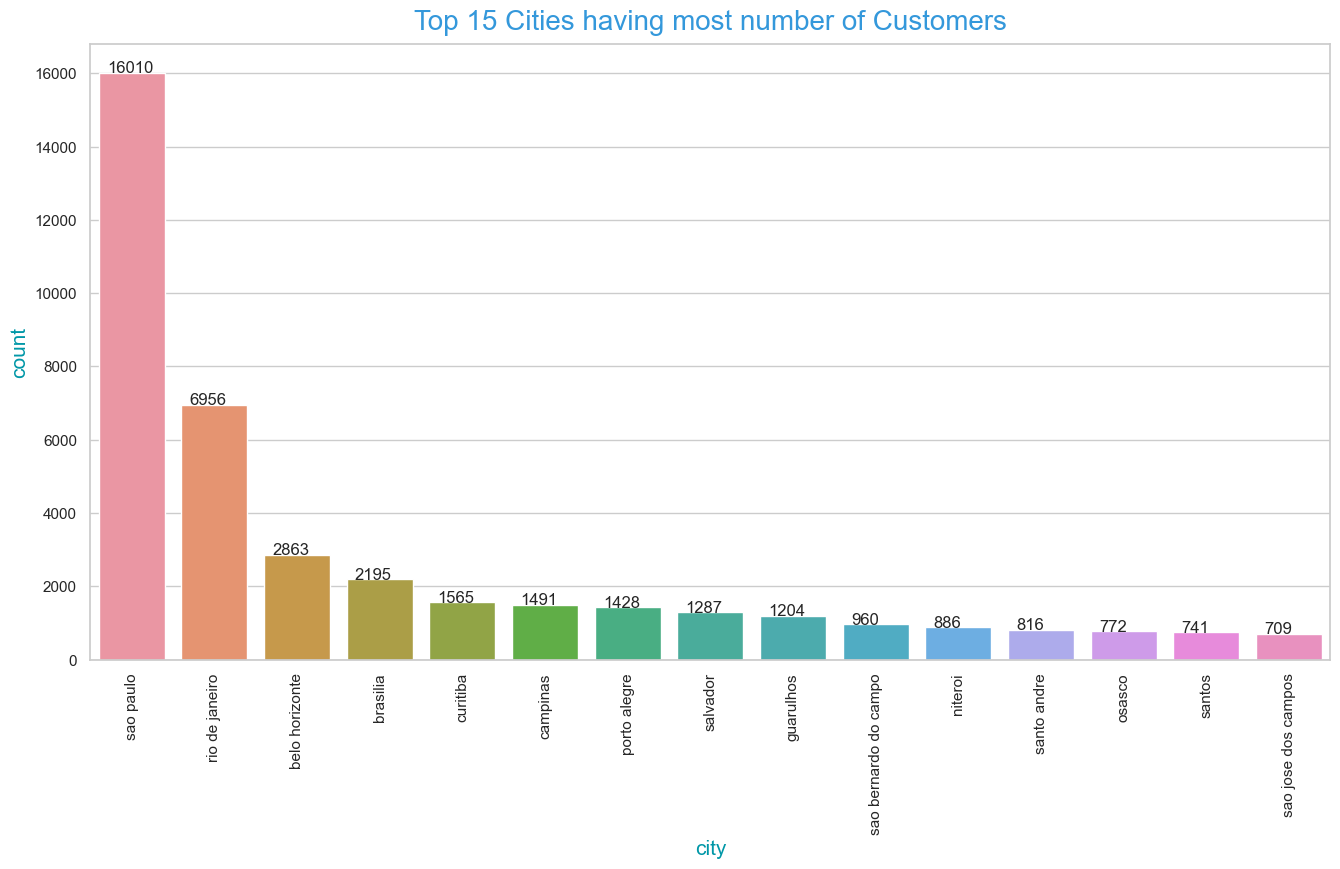

In [248]:
# Checking how many items most of the customers purchase 
city_df=pd.DataFrame(df['customer_city'].value_counts())
city_df=city_df.reset_index()
city_df.columns=['city','number_of_customers']
city_df.sort_values(by='number_of_customers', ascending=False).head(15)

bar_plot(16,8, city_df['city'].head(15),city_df['number_of_customers'].head(15) ,
         city_df, 'Top 15 Cities having most number of Customers','city','count', 90) # Plotting barplot

comment Most customers reside in Sao paulo ,rio de janeiro city.For future inventory planning Olist can choose among these cities 

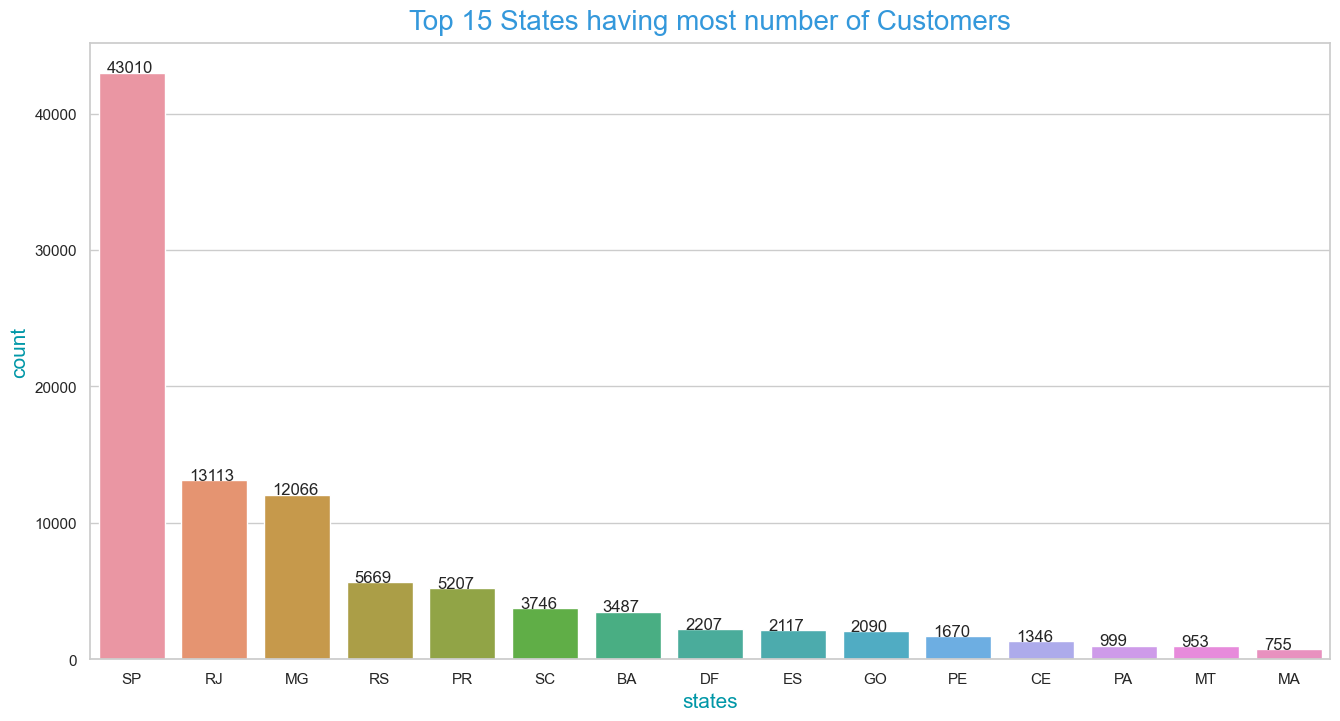

In [249]:
# Checking how many items most of the customers purchase 
state_df=pd.DataFrame(df['customer_state'].value_counts())
state_df=state_df.reset_index()
state_df.columns=['state','number_of_customers']
state_df.sort_values(by='number_of_customers', ascending=False).head(15)
bar_plot(16,8, state_df['state'].head(15),state_df['number_of_customers'].head(15) ,
         state_df, 'Top 15 States having most number of Customers','states','count', 0)

In [250]:
## User defined function to plot count plot.

def bar_plot_new(fig_X, fig_Y, data_X, data_Y,data,Title_1, X_Label, Y_Label, X_Ticks_Rotation):
    
    plt.figure(figsize = (fig_X, fig_Y))  ## Setting figure size
    colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
    pal = sns.color_palette(colors,10,1)
    sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters
    
    ## Code for first plot
    ax = sns.barplot(x = data_X, y=data_Y, data = data)  ## Code to plot Countplot in Seaborn
    
    plt.title(Title_1 , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
    plt.xlabel(X_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
    plt.ylabel(Y_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label
    plt.xticks(rotation = X_Ticks_Rotation)  # Set text labels and properties.
    
    for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
    
    plt.show()
    return

In [251]:
# Pivot table on some numerical columns based on product categories by their mean.
pivot_tab = df.pivot_table(index=['product_category_name'],values=['shipping_charges','Volume_litres'],aggfunc='mean')
pivot_tab=pivot_tab.reset_index()
pivot_tab

,product_category_name,Volume_litres,shipping_charges
0,Others,43.400000,18.801884
1,agro_industry_and_commerce,38.701931,37.931034
2,air_conditioning,34.647386,40.068182
3,art,30.375000,25.000000
4,arts_and_craftmanship,34.125000,69.000000
5,auto,47.270103,33.173709
6,baby,61.971910,34.232227
7,bed_bath_table,47.275969,29.108808
8,christmas_supplies,18.000000,30.857143
9,computers,70.957833,73.388889


In [252]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'product_id',
       'price', 'shipping_charges', 'order_item_id', 'customer_city',
       'customer_state', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'Volume_litres', 'revenue',
       'date_diff', 'order_approved_year', 'Approval_Ord_month',
       'delivered_month', 'purchase_Day'],
      dtype='object')

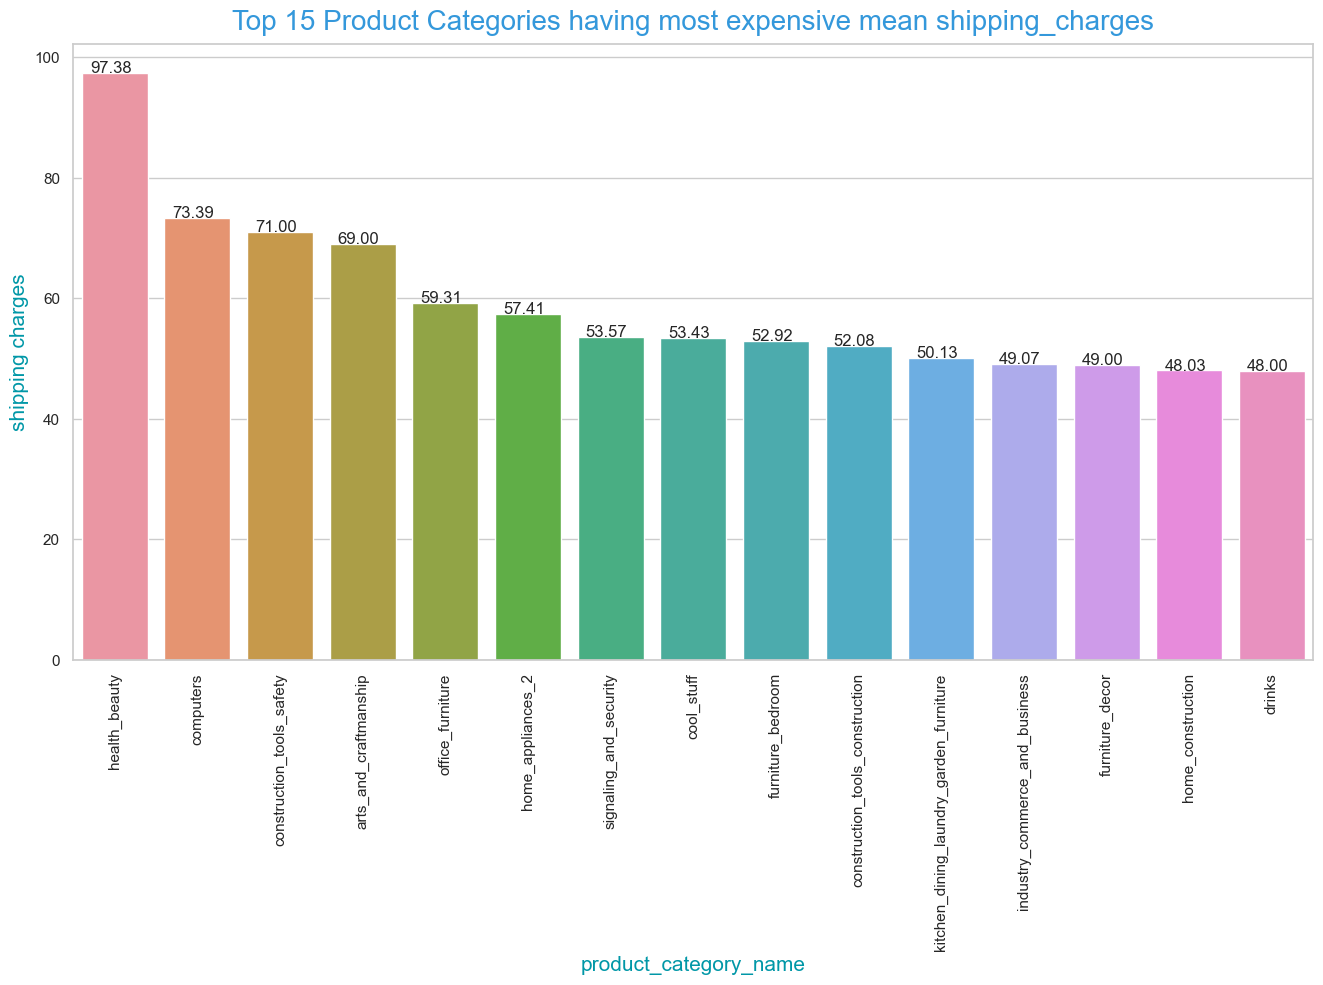

In [253]:
expensive_ship_charge=pivot_tab[['product_category_name','shipping_charges']].sort_values(by='shipping_charges',ascending=False).head(15)

# Top 15 Product Categories having most expensive mean net_shipping_charges 
bar_plot_new(16,8, expensive_ship_charge['product_category_name'],expensive_ship_charge['shipping_charges'] ,
         expensive_ship_charge, 'Top 15 Product Categories having most expensive mean shipping_charges','product_category_name','shipping charges',90)

comment:Olist's hefty shipping charges for health and beauty, computers, and construction tools can be a hurdle for some shoppers.

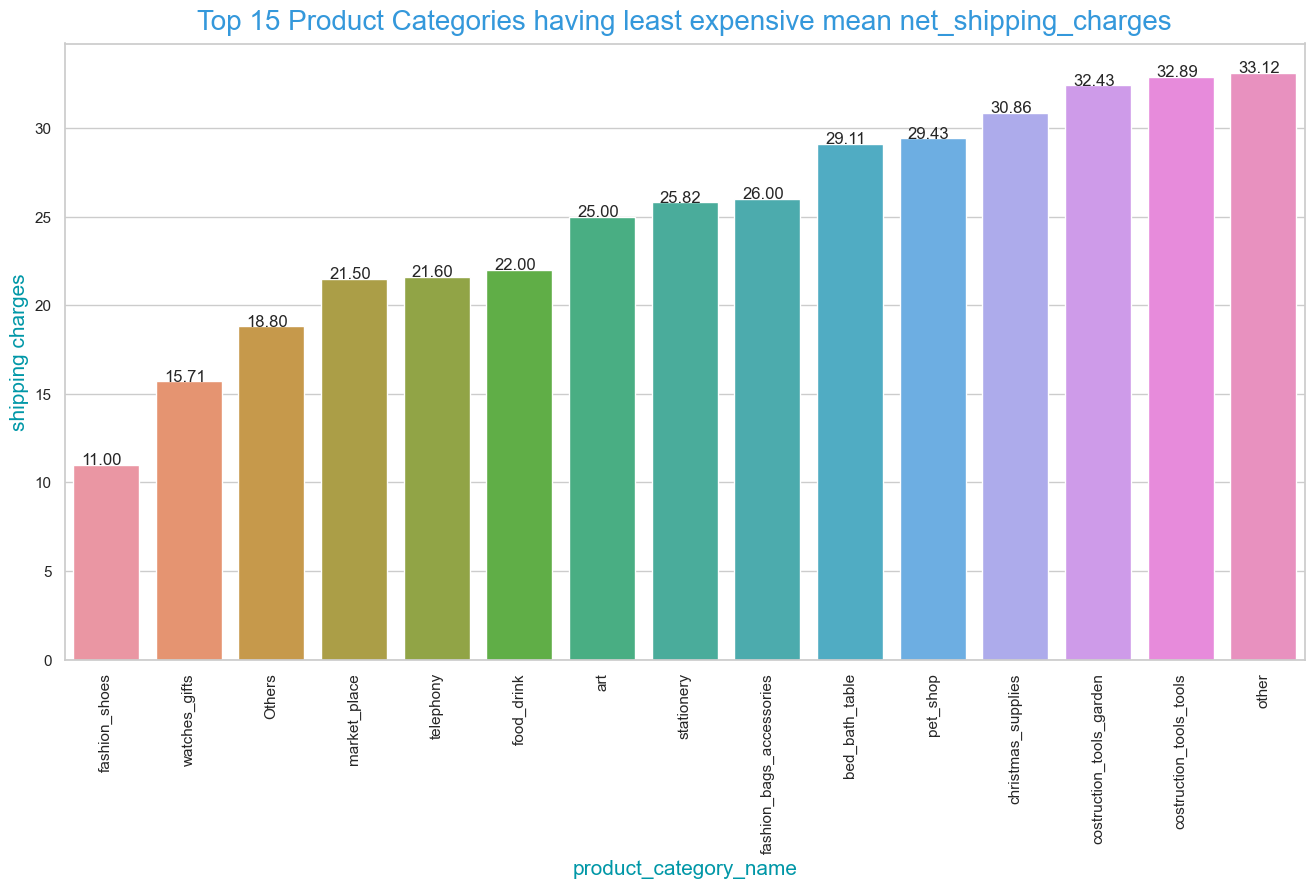

In [254]:
cheap_ship_charge=pivot_tab[['product_category_name','shipping_charges']].sort_values(by='shipping_charges',ascending=True).head(15)

# Top 15 Product Categories having most expensive mean net_shipping_charges 
bar_plot_new(16,8, cheap_ship_charge['product_category_name'],cheap_ship_charge['shipping_charges'] ,
         cheap_ship_charge, 'Top 15 Product Categories having least expensive mean net_shipping_charges','product_category_name','shipping charges',90)

comment :Good news for fashionistas! Olist's lower shipping charges on watches and shoes make online shopping even more enticing.

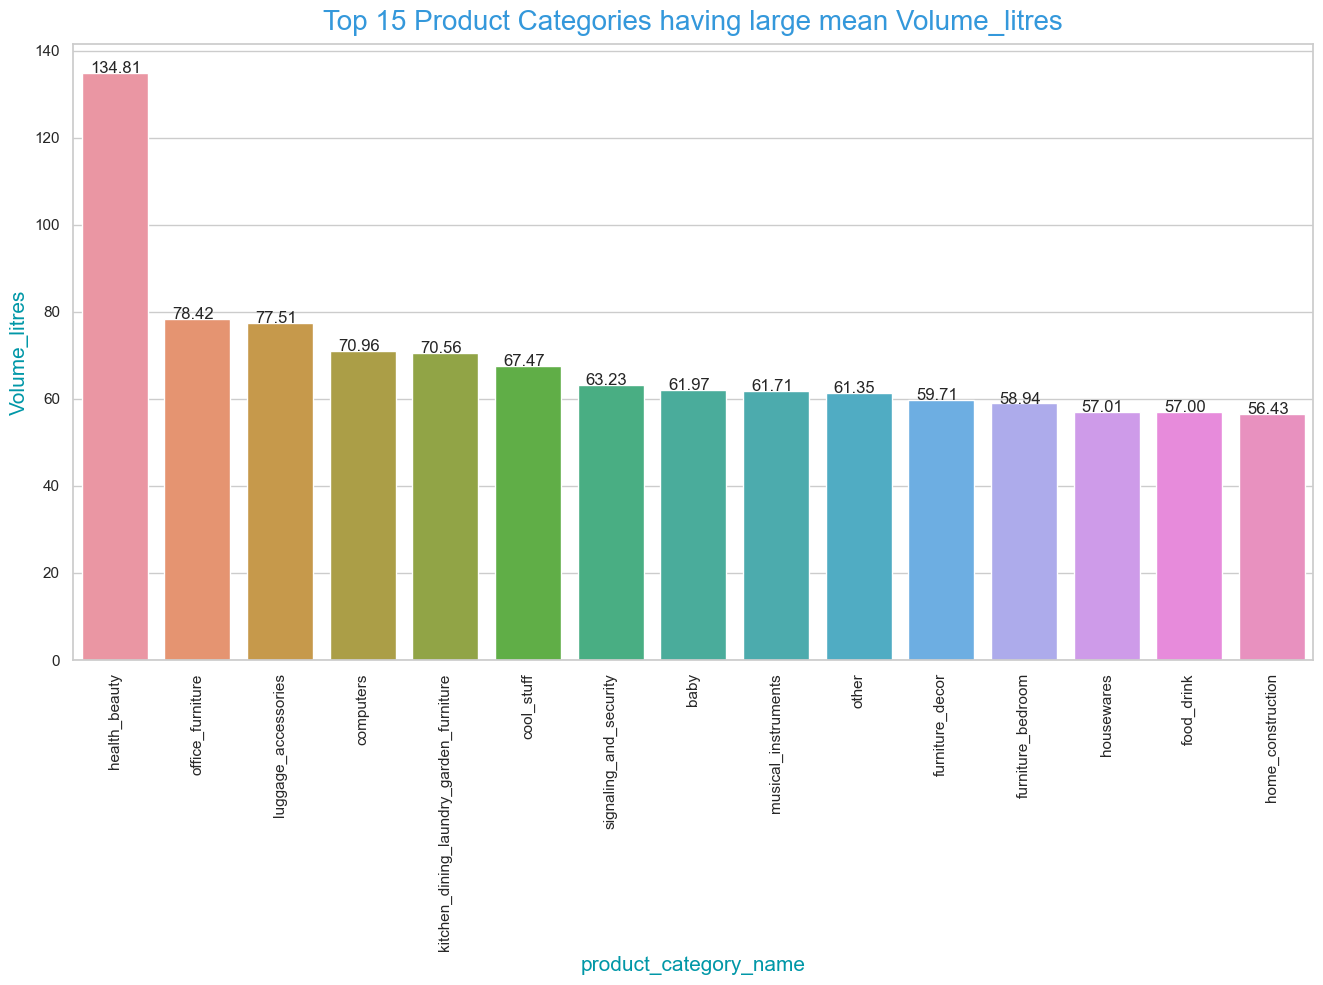

In [255]:
large_vol=pivot_tab[['product_category_name','Volume_litres']].sort_values(by='Volume_litres',ascending=False).head(15)

# Top 15 Product Categories having large mean Volume_litres
bar_plot_new(16,8, large_vol['product_category_name'],large_vol['Volume_litres'] ,
         large_vol, 'Top 15 Product Categories having large mean Volume_litres',
             'product_category_name','Volume_litres', 90)

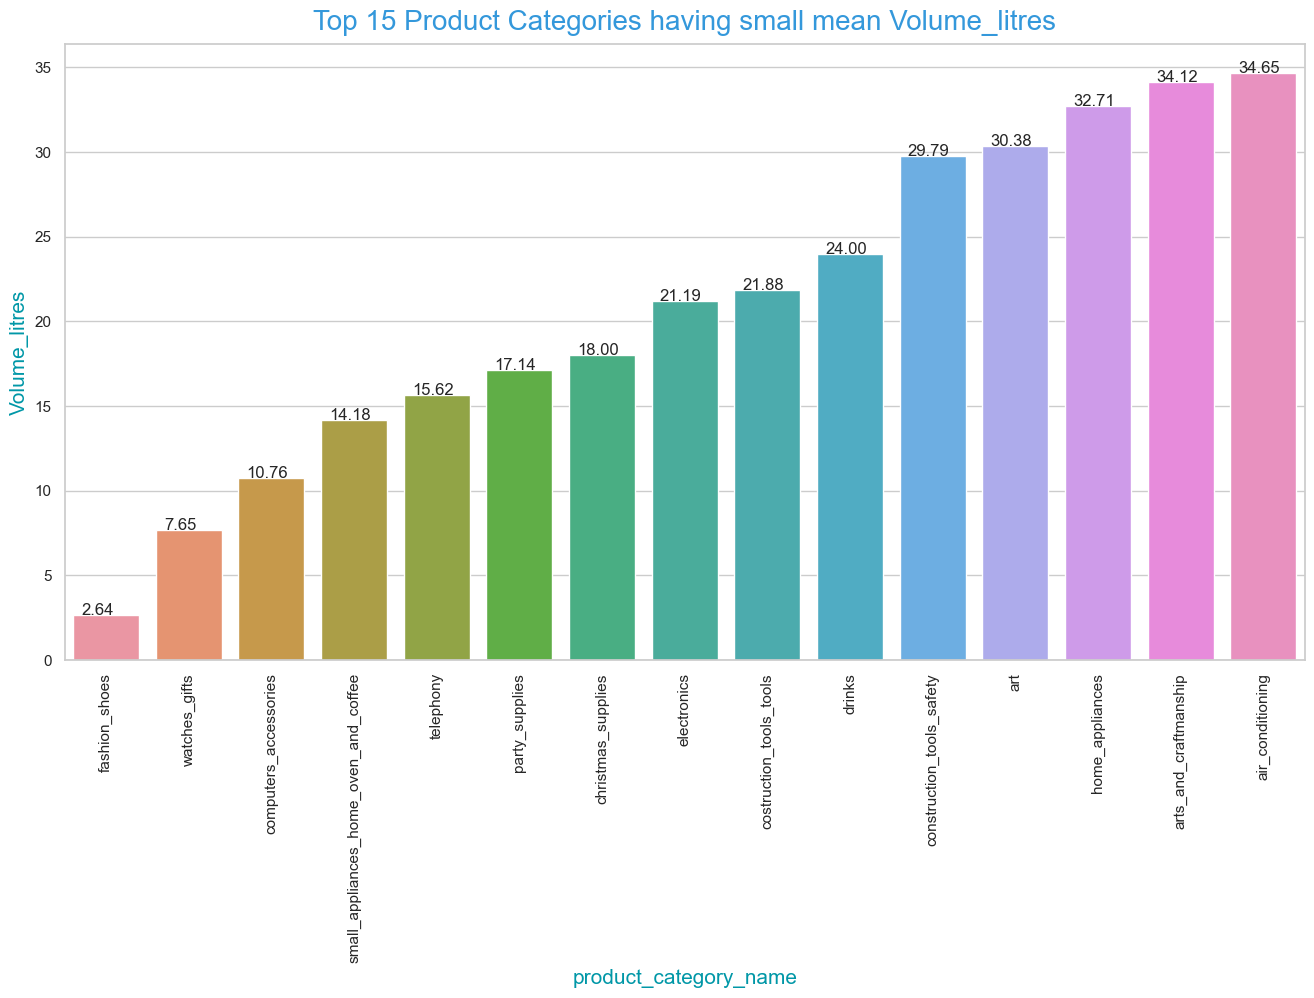

In [256]:
small_vol=pivot_tab[['product_category_name','Volume_litres']].sort_values(by='Volume_litres',ascending=True).head(15)

# Top 15 Product Categories having large mean product_volume_in_cubic_cm 
bar_plot_new(16,8, small_vol['product_category_name'],small_vol['Volume_litres'] ,
         small_vol, 'Top 15 Product Categories having small mean Volume_litres',
             'product_category_name','Volume_litres', 90)

In [257]:
## User defined function to plot count plot.

def count_plot(fig_X, fig_Y, data_X, data, Title_1, X_Label, Y_Label, X_Ticks_Rotation):
    
    plt.figure(figsize = (fig_X, fig_Y))  ## Setting figure size
    colors=['Crimson','Wheat','DeepSkyBlue','#F8C471','Turquoise','DarkKhaki','Coral','#3498DB','#FFEB3B','#DE3163']
    pal = sns.color_palette(colors,10,1)
    sns.set_theme(style="whitegrid", palette=pal, font='sans-serif', font_scale=1) ## Setting theme parameters
    
    ## Code for first plot
    ax = sns.countplot(x = data_X, data = data)  ## Code to plot Countplot in Seaborn
    
    plt.title(Title_1 , fontdict= {"fontsize" : 20, "fontweight": 25, "color":'#3498DB'}, loc= "center", pad = 10)  ## Code to set a title
    plt.xlabel(X_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting x-label
    plt.ylabel(Y_Label, fontdict= {"fontsize" : 15, "fontweight": 10, "color":'#0097A7'})  ## Setting y-label
    plt.xticks(rotation = X_Ticks_Rotation)  # Set text labels and properties.
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
    
    plt.show()
    return

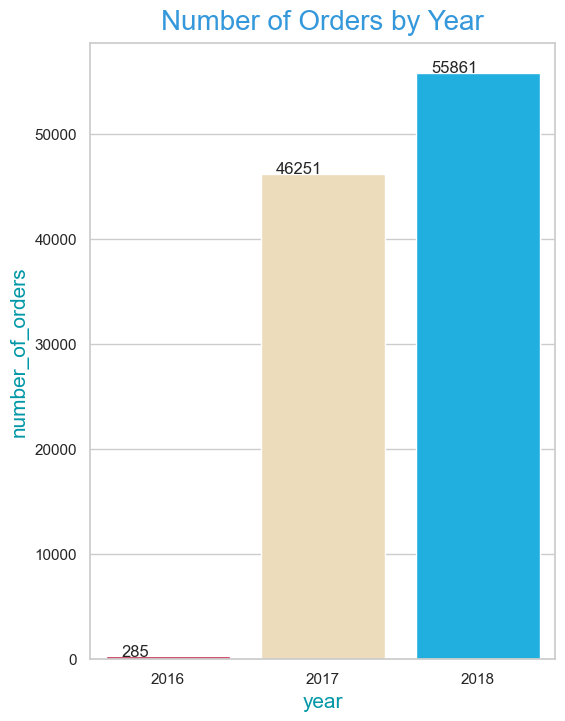

In [258]:
count_plot(6,8, df.order_approved_year, 
         df, 'Number of Orders by Year','year','number_of_orders', 0)

comment :Olist's journey has been remarkable! From 285 orders in 2016, they scaled to over 9610 orders by 2018. (Showcases the platform's growth trajectory)

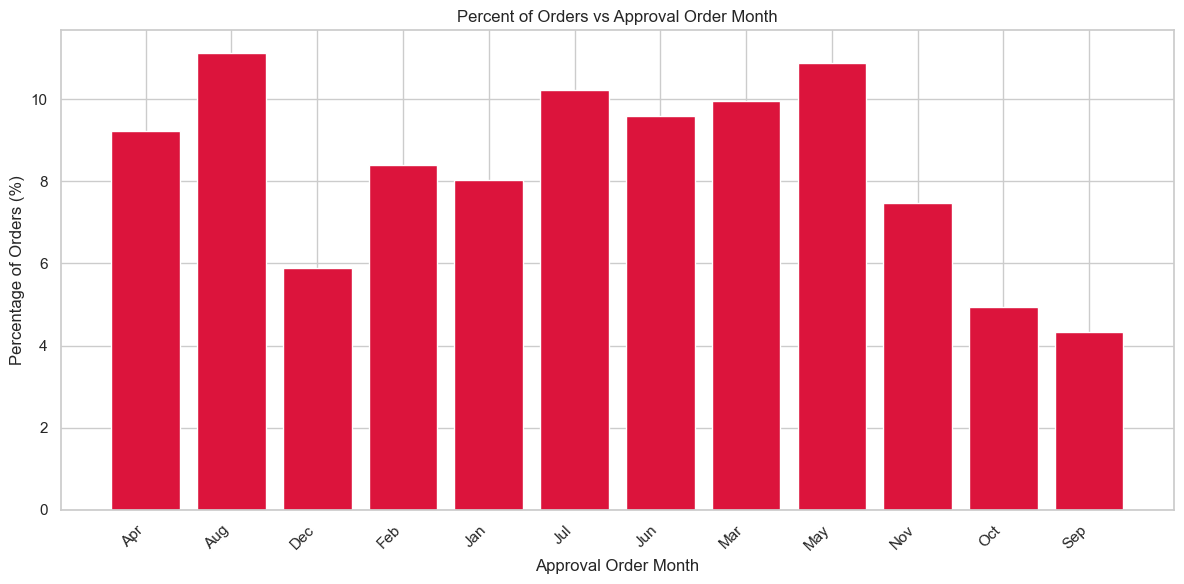

In [259]:
# Calculate the percentage of orders for each approval month
monthly_orders = df.groupby('Approval_Ord_month')['order_id'].count()
total_orders = len(df)
monthly_percent = (monthly_orders / total_orders) * 100

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(monthly_percent.index, monthly_percent.values)

# Add labels and title
plt.xlabel('Approval Order Month')
plt.ylabel('Percentage of Orders (%)')
plt.title('Percent of Orders vs Approval Order Month')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

comment :October and September may be quieter months for Olist compared to the peak seasons of May, July, and August, offering potential opportunities for targeted marketing campaigns.

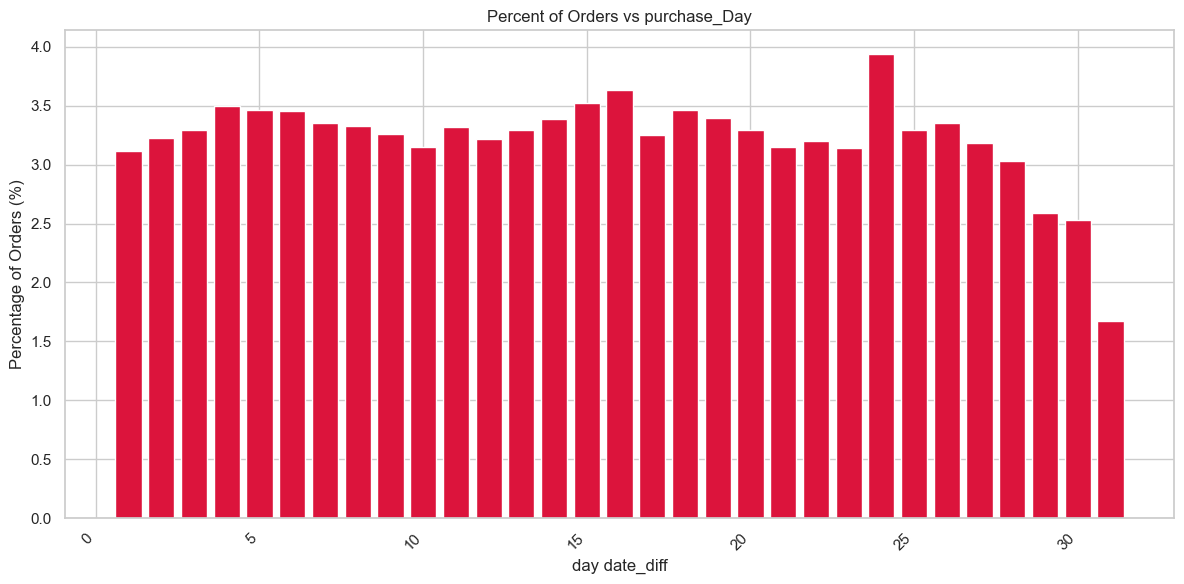

In [260]:
# Calculate the percentage of orders in difference of days between approval and delivered
monthly_orders = df.groupby('purchase_Day')['order_id'].count()
total_orders = len(df)
monthly_percent = (monthly_orders / total_orders) * 100

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(monthly_percent.index, monthly_percent.values)

# Add labels and title
plt.xlabel('day date_diff')
plt.ylabel('Percentage of Orders (%)')
plt.title('Percent of Orders vs purchase_Day')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [261]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'product_id',
       'price', 'shipping_charges', 'order_item_id', 'customer_city',
       'customer_state', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'Volume_litres', 'revenue',
       'date_diff', 'order_approved_year', 'Approval_Ord_month',
       'delivered_month', 'purchase_Day'],
      dtype='object')

In [262]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'product_id',
       'price', 'shipping_charges', 'order_item_id', 'customer_city',
       'customer_state', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'Volume_litres', 'revenue',
       'date_diff', 'order_approved_year', 'Approval_Ord_month',
       'delivered_month', 'purchase_Day'],
      dtype='object')

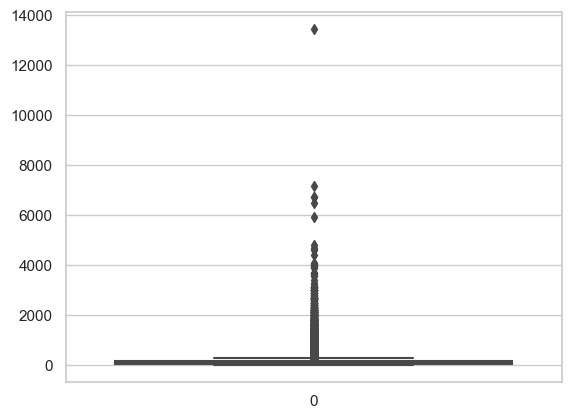

In [263]:
sns.boxplot(df['price'])
plt.show()

In [264]:
# Bi variate analysis:
#     Catergorical versus numerical
#     Customer_city versus order item count

# Get the top 10 customer cities based on order_item_id count
top_10_cities = df.groupby('customer_city')['order_item_id'].count().sort_values(ascending=False).head(10)

# Extract the city names and order_item_id counts
city_names = top_10_cities.index.to_list()
order_item_counts = top_10_cities.to_list()

# Create the bar chart with clear labels and title
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(city_names, order_item_counts)
plt.xlabel("Customer City", fontsize=12)
plt.ylabel("Order Item ID Count", fontsize=12)
plt.title("Top 10 Customer Cities by Order Item ID Count", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing for clarity
plt.show()

In [265]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'product_id',
       'price', 'shipping_charges', 'order_item_id', 'customer_city',
       'customer_state', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'Volume_litres', 'revenue',
       'date_diff', 'order_approved_year', 'Approval_Ord_month',
       'delivered_month', 'purchase_Day'],
      dtype='object')

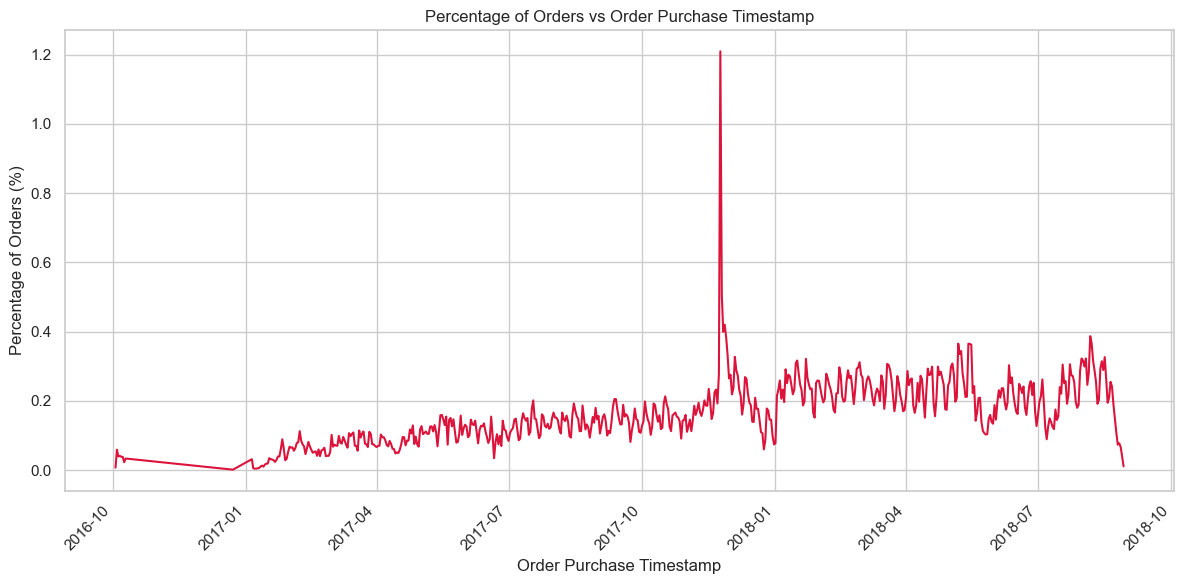

In [266]:
order_counts = df.groupby('order_purchase_timestamp')['order_id'].count()
total_orders = len(df)
order_percent = (order_counts / total_orders) * 100

# Create the line plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(order_percent.index, order_percent.values)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Order Purchase Timestamp')
plt.ylabel('Percentage of Orders (%)')
plt.title('Percentage of Orders vs Order Purchase Timestamp')

# Show the plot
plt.tight_layout()
plt.show()

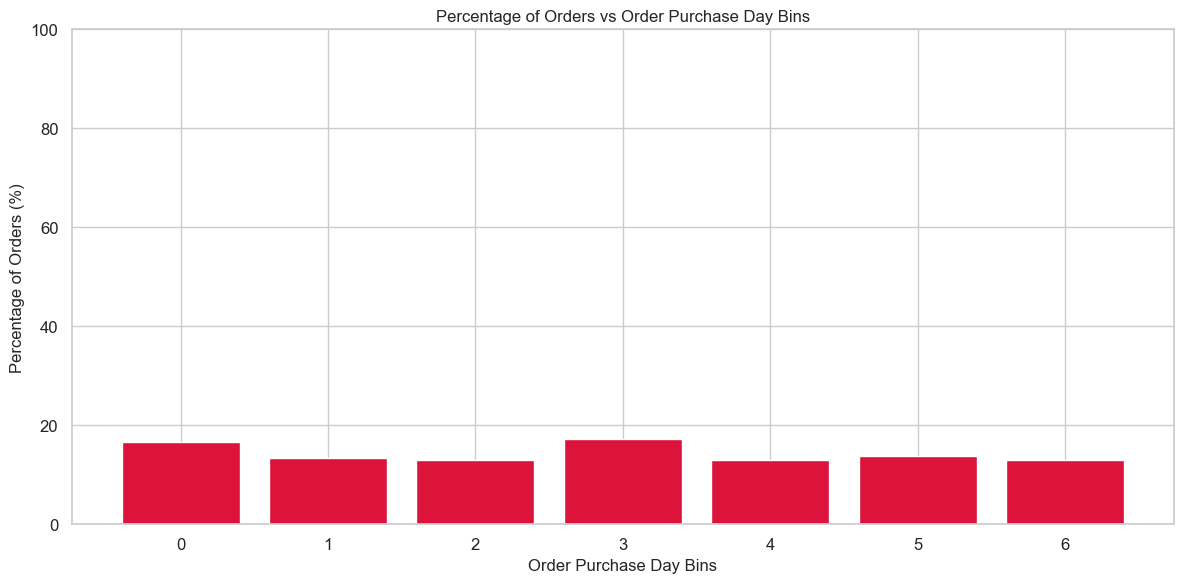

In [267]:
bins = pd.cut(df['order_purchase_timestamp'].dt.day, bins=7, labels=False)  # Adjust bins as needed

# Calculate counts and percentages of orders grouped by bins
order_counts_by_bin = df.groupby(bins)['order_id'].count()
total_orders = len(df)
order_percent_by_bin = (order_counts_by_bin / total_orders) * 100

# Create the bar plot (better suited for discrete bins)
plt.figure(figsize=(12, 6))
plt.bar(order_percent_by_bin.index, order_percent_by_bin.values)

# Add labels and title
plt.xlabel('Order Purchase Day Bins')
plt.ylabel('Percentage of Orders (%)')
plt.title('Percentage of Orders vs Order Purchase Day Bins')

# Adjust volume for better visibility
plt.gca().set_ylim(bottom=0, top=100)
plt.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()




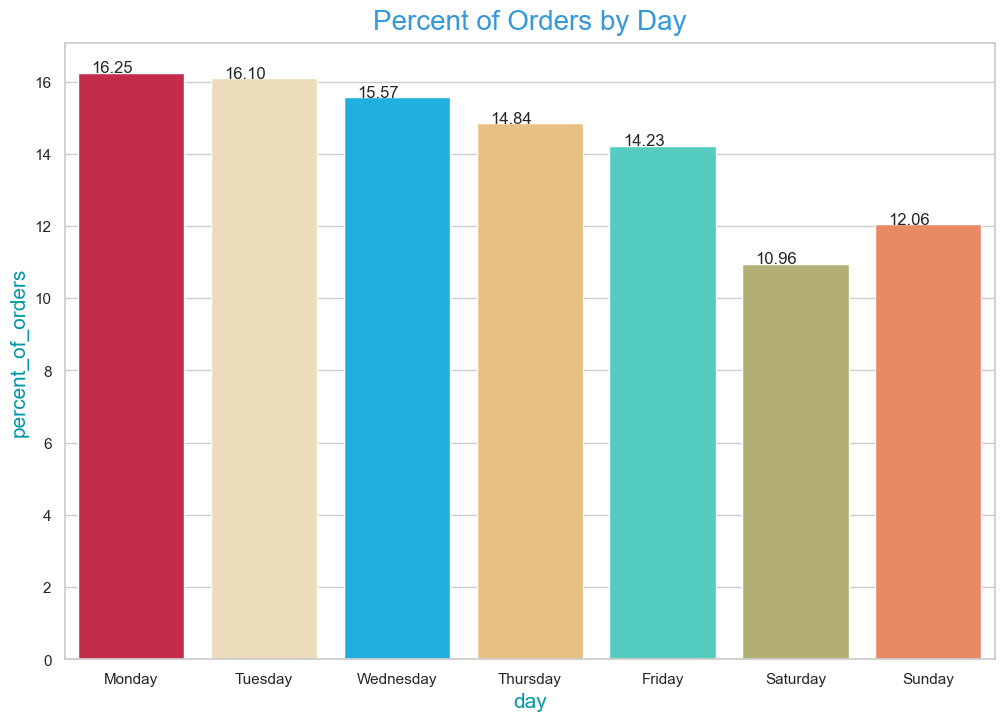

In [268]:
new_day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

day_df=pd.DataFrame((df['order_purchase_timestamp'].dt.strftime('%A')).value_counts(normalize=True)*100) 
day_df = day_df.reindex(new_day_order, axis=0)
day_df=day_df.reset_index()
day_df.columns=['day','number_of_customers']

bar_plot_new(12,8, day_df['day'], day_df['number_of_customers'] , 
           day_df, 'Percent of Orders by Day','day','percent_of_orders', 0)

comment :monday tuesday olist website will be busy because maximum num of orders are seen on these day over past 2 years compared to weekend

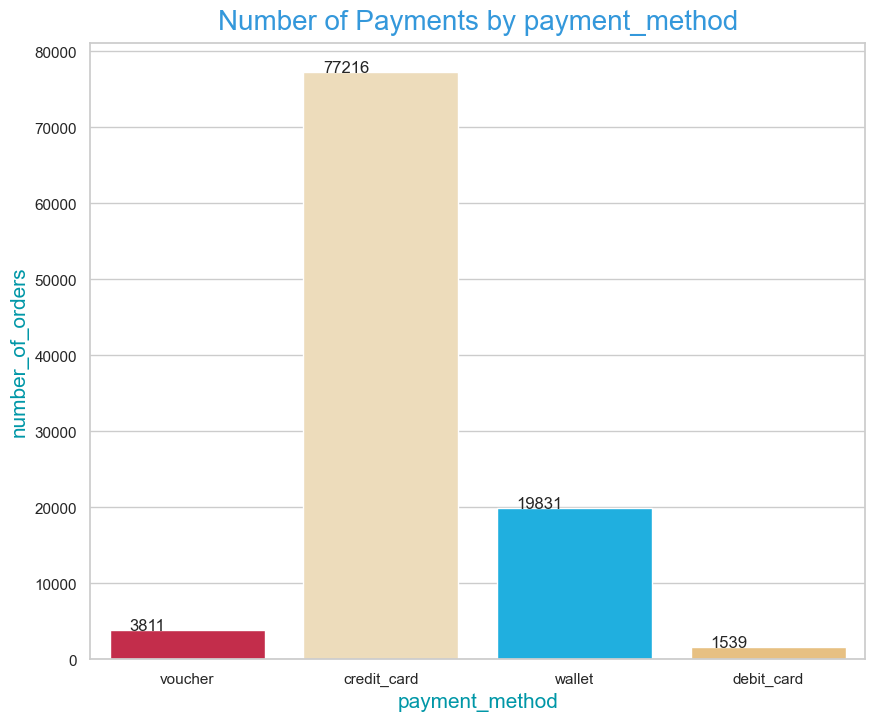

In [269]:
count_plot(10,8, df['payment_type'], 
           df, 'Number of Payments by payment_method','payment_method','number_of_orders', 0)

comment :MAximum Olist customer prefer credit card payment 

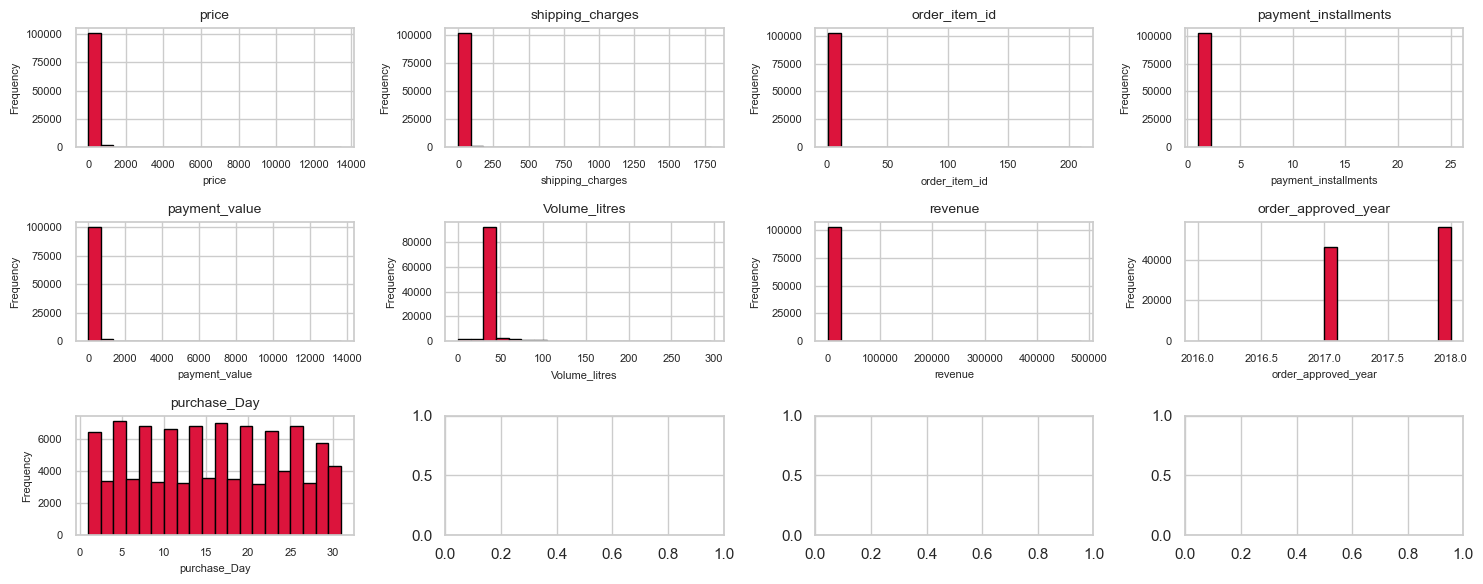

In [270]:
#  Select the column to analyze
# Select the numerical columns to visualize
numerical_cols = df.select_dtypes(include=['number']).columns[:18]
 
# Create the correct number of subplots based on the number of columns
nrows, ncols = len(numerical_cols) // 4 + 1, 4  # Calculate rows and columns dynamically
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6))

# Iterate through columns and create histograms with customization
for i, ax in enumerate(axes.flat):
    if i < len(numerical_cols):  # Ensure you don't access indices beyond the column list
        column = numerical_cols[i]
        ax.hist(df[column], bins=20, edgecolor="black")
        ax.set_title(column, fontsize=10)
        ax.set_xlabel(column, fontsize=8)
        ax.set_ylabel("Frequency", fontsize=8)
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax.axis('on')  # Ensure axes are visible

# Tight layout for better spacing
plt.tight_layout()
plt.show()

In [271]:
# no outlier is present based on above figure

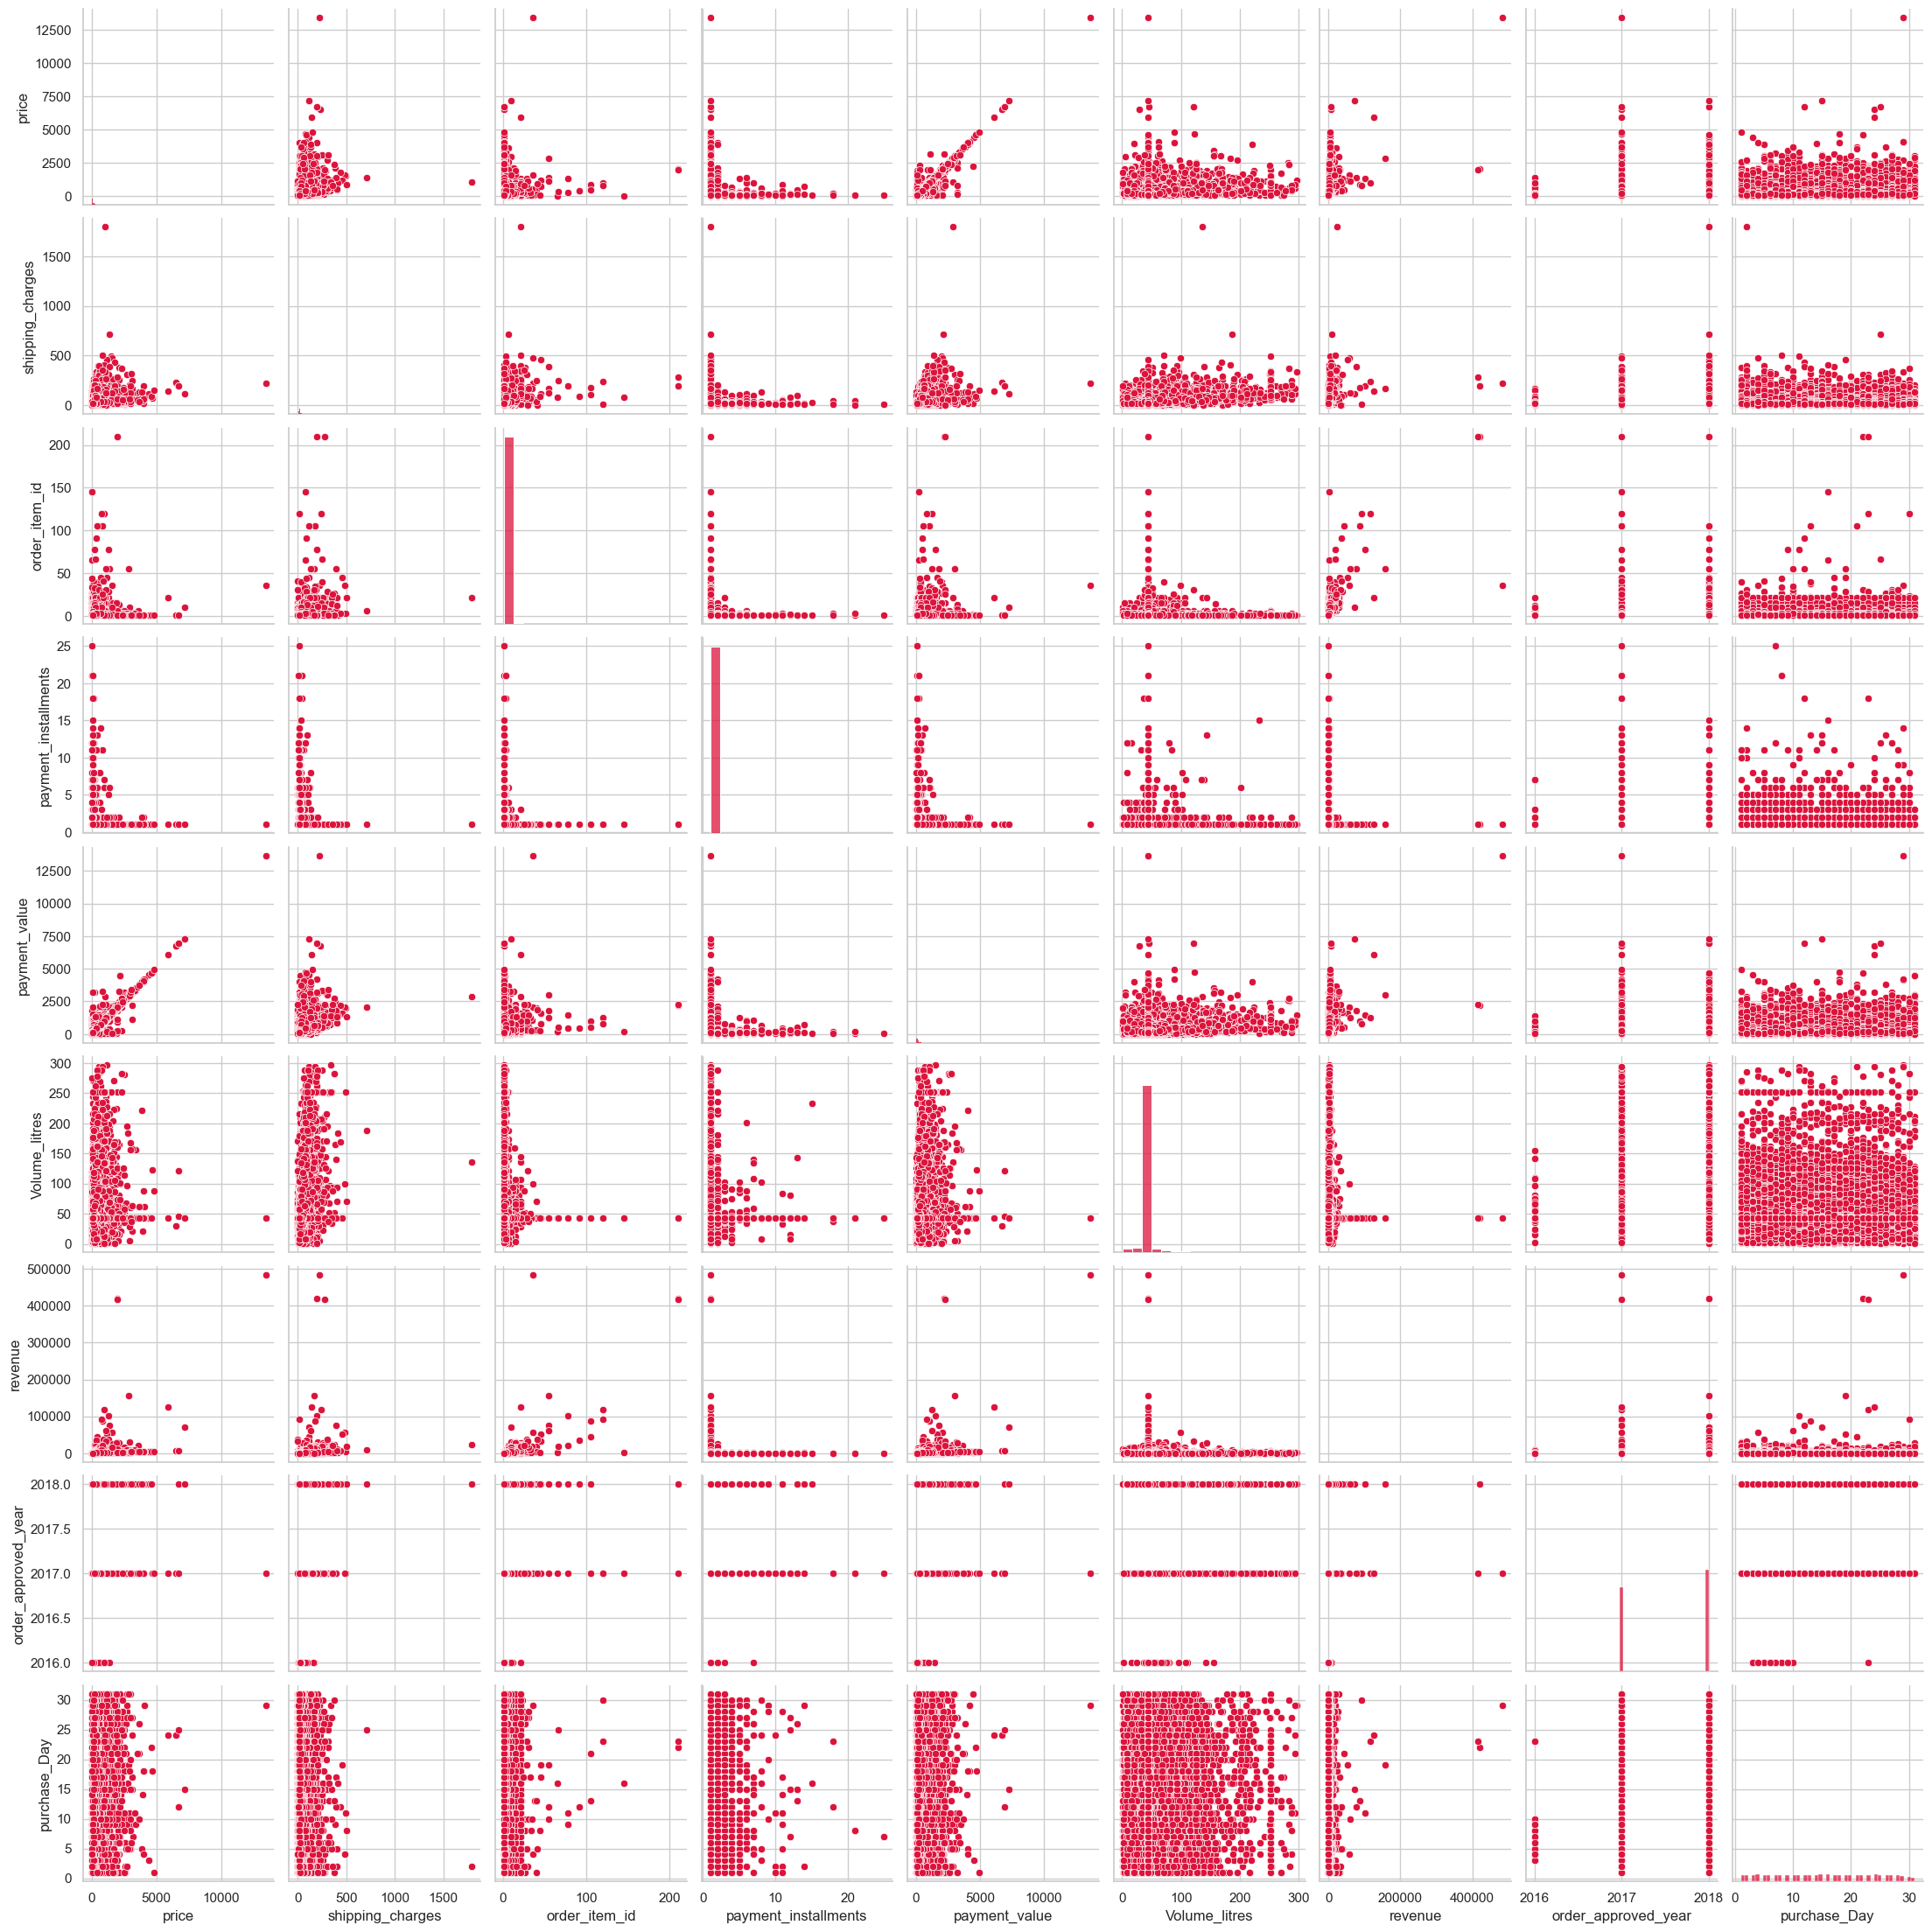

In [272]:
sns.pairplot(data=df)
plt.show()

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102397 entries, 0 to 102396
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  102397 non-null  object        
 1   customer_id               102397 non-null  object        
 2   order_purchase_timestamp  102397 non-null  datetime64[ns]
 3   product_id                102397 non-null  object        
 4   price                     102397 non-null  int64         
 5   shipping_charges          102397 non-null  int64         
 6   order_item_id             102397 non-null  int64         
 7   customer_city             102397 non-null  object        
 8   customer_state            102397 non-null  object        
 9   payment_type              102397 non-null  object        
 10  payment_installments      102397 non-null  float64       
 11  payment_value             102397 non-null  float64       
 12  pr

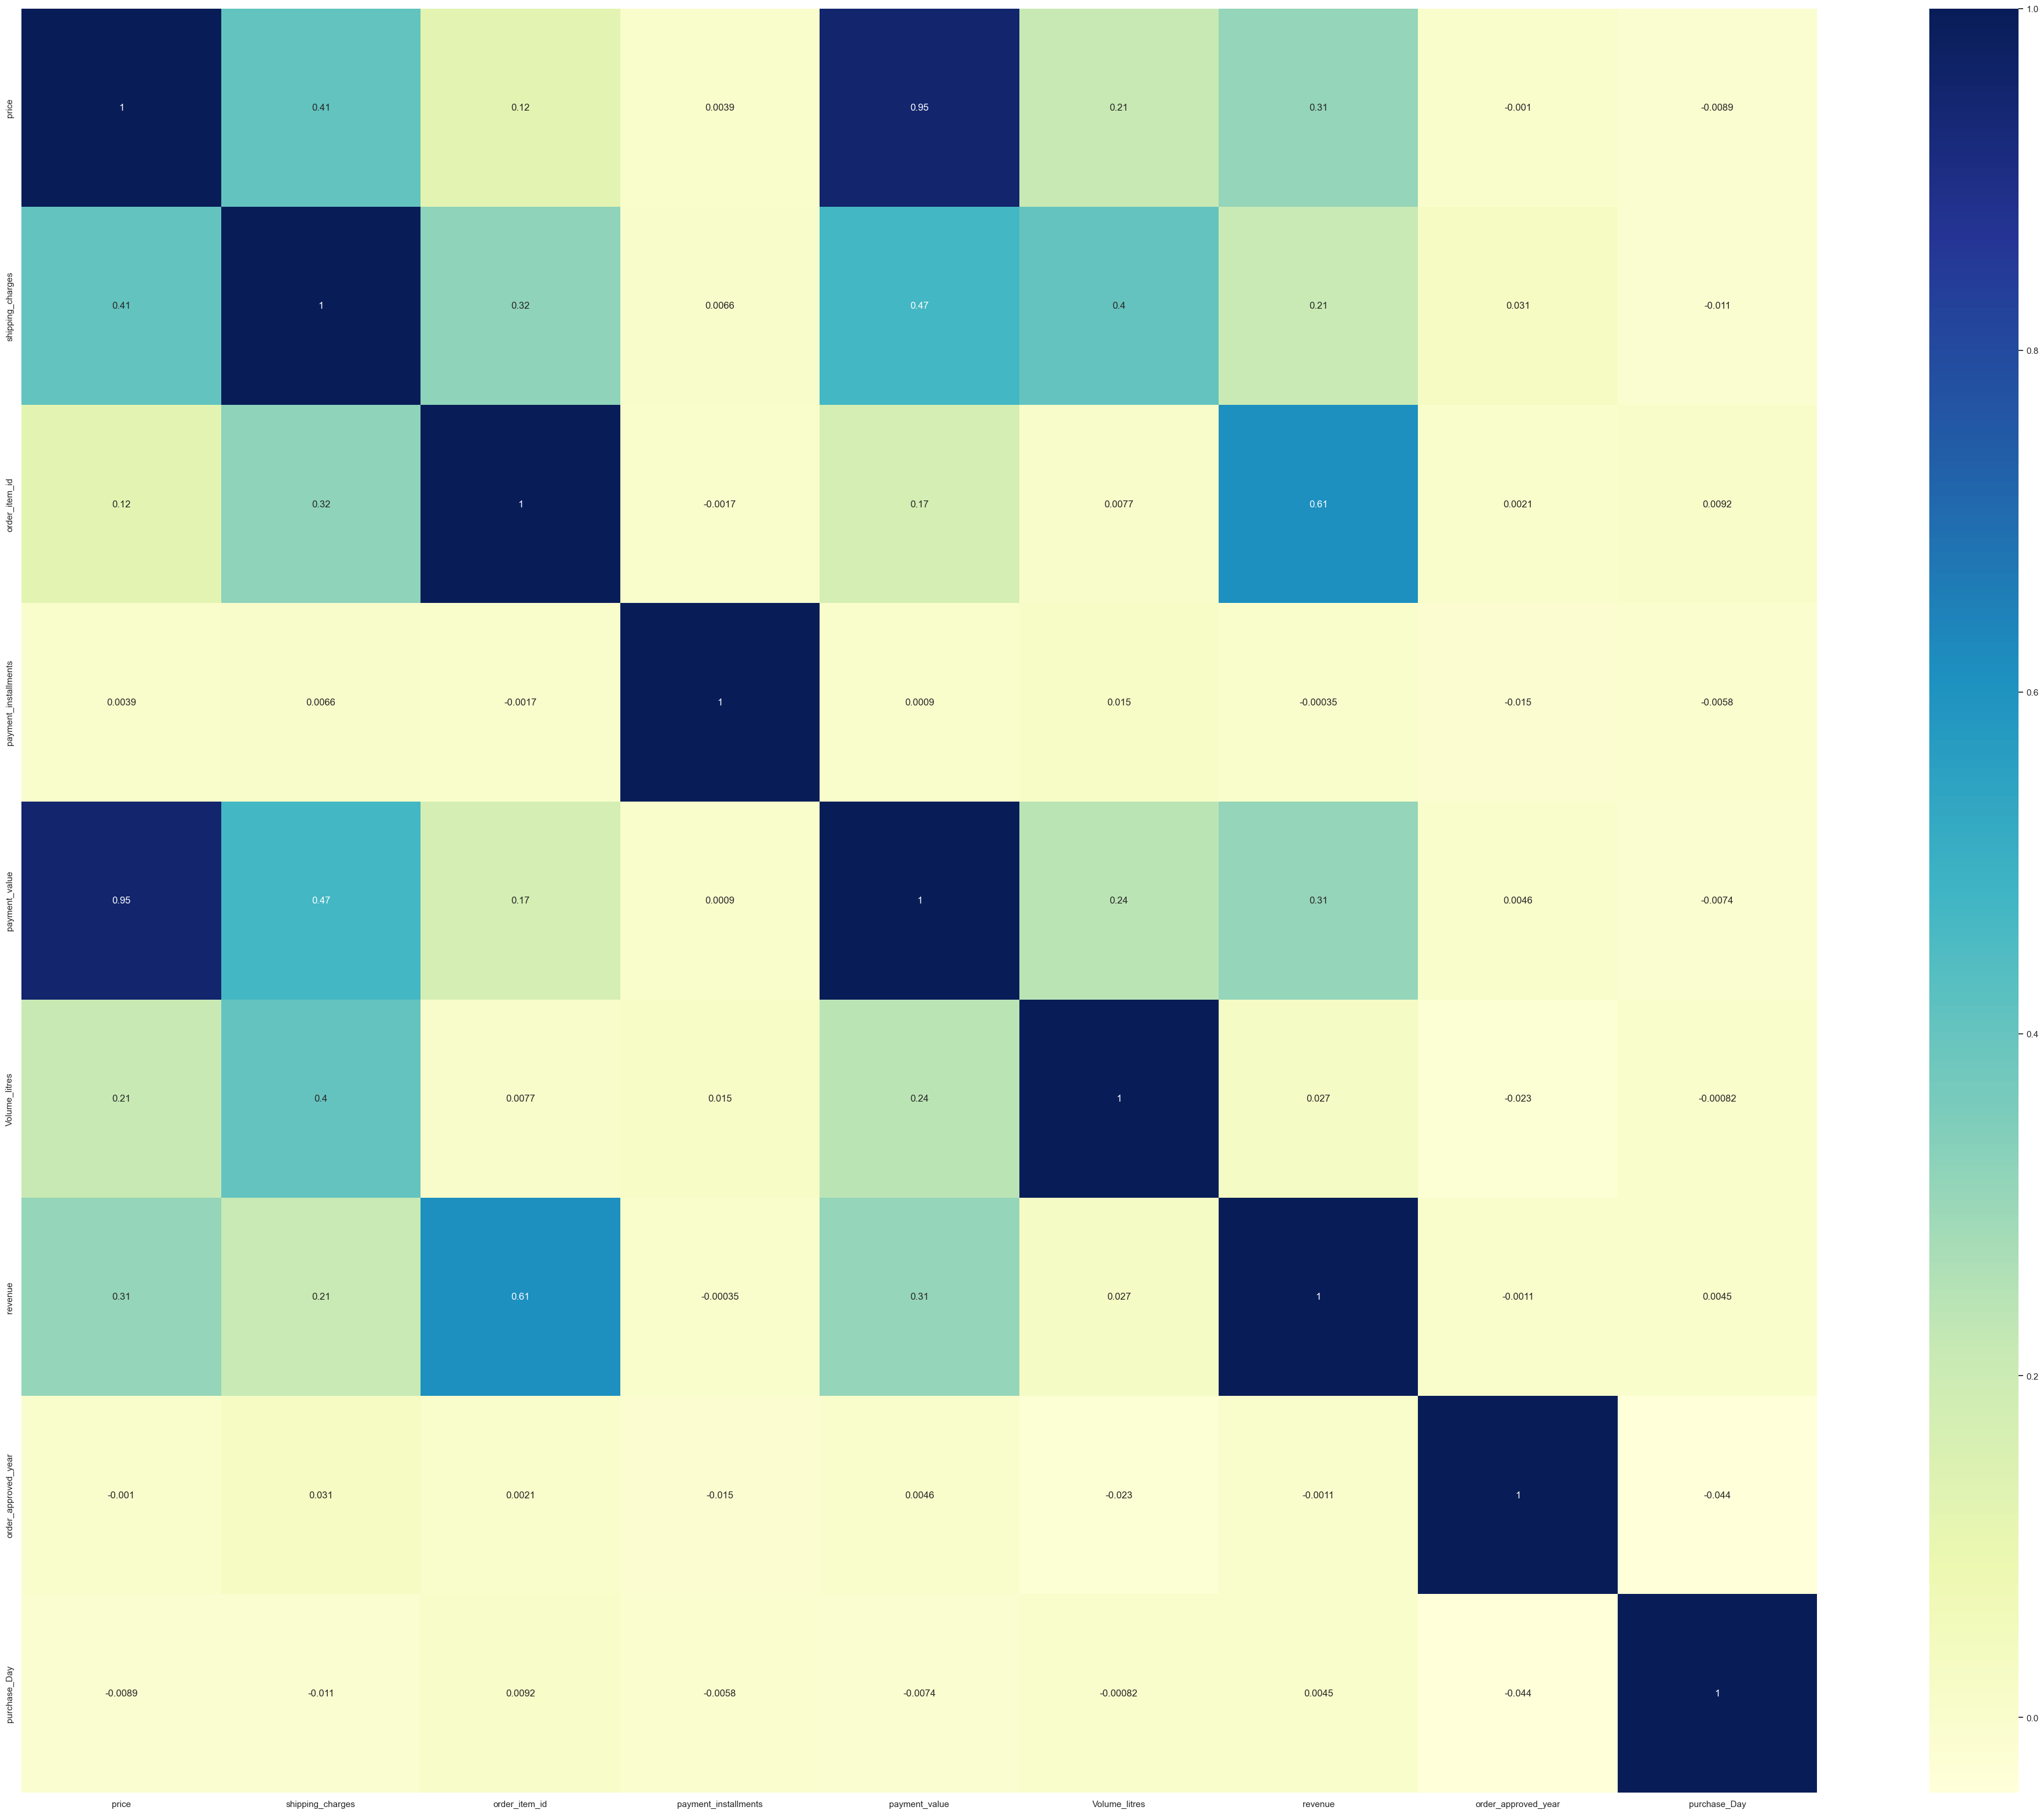

In [274]:
#checking corelation
plt.figure(figsize = (50,40))
sns.heatmap( df.select_dtypes(include=['number']).corr(), annot = True, cmap="YlGnBu")
plt.show()

comment :Payment value and price are highly positive correlated with 0.95
Revenue is positvely corrrelated to quantity of order

In [275]:
# Sort by quantity in descending order and get the top 20 products
# Count order item IDs per product id
product_counts = df.groupby('product_id')['order_item_id'].count().sort_values(ascending=False)

# Get the top 20 product categories
top_20  = product_counts.head(20)

# Print the top 20 categories and their counts
print(top_20 )

# Alternatively, access the top 20 categories as a DataFrame:
top_20_df = top_20 .to_frame()


product_id
99a4788cb24856965c36a24e339b6058    474
aca2eb7d00ea1a7b8ebd4e68314663af    428
422879e10f46682990de24d770e7f83d    362
d1c427060a0f73f6b889a5c7c61f2ac4    315
389d119b48cf3043d311335e499d9c6b    314
53b36df67ebb7c41585e8d54d6772e08    308
368c6c730842d78016ad823897a372db    296
53759a2ecddad2bb87a079a1f1519f73    292
154e7e31ebfa092203795c972e5804a6    264
3dd2a17168ec895c781a9191c1e95ad7    257
2b4609f8948be18874494203496bc318    256
7c1bd920dbdf22470b68bde975dd3ccf    214
e0d64dcfaa3b6db5c54ca298ae101d05    195
bb50f2e236e5eea0100680137654686c    192
5a848e4ab52fd5445cdc07aab1c40e48    187
a62e25e09e05e6faf31d90c6ec1aa3d1    172
35afc973633aaeb6b877ff57b2793310    157
e53e557d5a159f5aa2c5e995dfdf244b    157
a92930c327948861c015c919a0bcb4a8    157
42a2c92a0979a949ca4ea89ec5c7b934    154
Name: order_item_id, dtype: int64


In [276]:
df=df.drop(['order_purchase_timestamp'],axis=1)
# dropping order_purchase_timestamp for further analysis in the tableau as per the Grading Rubrics

# Exporting Cleaned Data

In [277]:

market_retail=df.to_excel(r'C:\Users\VASU RAVILLA\Downloads\Marketing_capstone\cleaned_retail_dataset.xlsx')

In [278]:
df.shape

(102397, 19)